In [1]:
"""
K-MEANS CLUSTERING DESDE CERO
=============================

Objetivos:
- Comprender K-means a través de implementación scratch
- Realizar análisis de clusters completo
- Implementar métodos de evaluación (Elbow, Silhouette)
- Analizar datos reales de clientes mayoristas
- Comparar con métodos alternativos (DBSCAN, t-SNE)

Sprint: Algoritmos de clustering no supervisado
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("="*80)
print("K-MEANS CLUSTERING DESDE CERO")
print("Implementación Scratch y Análisis de Clusters")
print("="*80)


K-MEANS CLUSTERING DESDE CERO
Implementación Scratch y Análisis de Clusters


In [2]:
# ============================================================================
# 1. FUNDAMENTOS TEÓRICOS DE K-MEANS
# ============================================================================

print("📚 1. FUNDAMENTOS TEÓRICOS DE K-MEANS")
print("="*40)

print("""
🎯 K-MEANS CLUSTERING:
─────────────────────

📊 CONCEPTO CENTRAL:
   • Algoritmo de clustering particional
   • Divide n observaciones en k clusters
   • Minimiza la suma de cuadrados intra-cluster (SSE)
   • Cada punto pertenece al cluster con centroide más cercano

🧮 FUNCIÓN OBJETIVO (SSE):
   SSE = Σₙ₌₁ᴺ Σₖ₌₁ᴷ wₙₖ ||xₙ - μₖ||²
   
   Donde:
   • N: número total de puntos
   • K: número de clusters
   • xₙ: punto de datos n
   • μₖ: centroide del cluster k
   • wₙₖ: 1 si xₙ pertenece al cluster k, 0 en caso contrario

🔄 ALGORITMO K-MEANS:
   1. Inicializar k centroides aleatoriamente
   2. REPETIR hasta convergencia:
      a) Asignar cada punto al centroide más cercano
      b) Recalcular centroides como media de puntos asignados
   3. PARAR cuando centroides no cambien significativamente

📏 DISTANCIA EUCLIDIANA:
   d(p,q) = √[(p₁-q₁)² + (p₂-q₂)² + ... + (pₘ-qₘ)²]
   d(p,q) = ||q - p|| = √((q-p)·(q-p))

🎛️ HIPERPARÁMETROS:
   • k (n_clusters): Número de clusters
   • max_iter: Máximo número de iteraciones
   • tol: Tolerancia para convergencia
   • n_init: Número de inicializaciones aleatorias

🔍 CRITERIOS DE PARADA:
   • Centroides no cambian más que tolerancia
   • Se alcanza el máximo de iteraciones
   • Asignaciones no cambian entre iteraciones

💡 VENTAJAS:
   • Computacionalmente eficiente O(nkt)
   • Fácil de implementar e interpretar
   • Funciona bien con clusters esféricos
   • Escalable a datasets grandes

⚠️ LIMITACIONES:
   • Requiere especificar k a priori
   • Sensible a inicialización
   • Asume clusters esféricos de tamaño similar
   • Sensible a outliers
""")

print("✅ Fundamentos teóricos establecidos")


📚 1. FUNDAMENTOS TEÓRICOS DE K-MEANS

🎯 K-MEANS CLUSTERING:
─────────────────────

📊 CONCEPTO CENTRAL:
   • Algoritmo de clustering particional
   • Divide n observaciones en k clusters
   • Minimiza la suma de cuadrados intra-cluster (SSE)
   • Cada punto pertenece al cluster con centroide más cercano

🧮 FUNCIÓN OBJETIVO (SSE):
   SSE = Σₙ₌₁ᴺ Σₖ₌₁ᴷ wₙₖ ||xₙ - μₖ||²
   
   Donde:
   • N: número total de puntos
   • K: número de clusters
   • xₙ: punto de datos n
   • μₖ: centroide del cluster k
   • wₙₖ: 1 si xₙ pertenece al cluster k, 0 en caso contrario

🔄 ALGORITMO K-MEANS:
   1. Inicializar k centroides aleatoriamente
   2. REPETIR hasta convergencia:
      a) Asignar cada punto al centroide más cercano
      b) Recalcular centroides como media de puntos asignados
   3. PARAR cuando centroides no cambien significativamente

📏 DISTANCIA EUCLIDIANA:
   d(p,q) = √[(p₁-q₁)² + (p₂-q₂)² + ... + (pₘ-qₘ)²]
   d(p,q) = ||q - p|| = √((q-p)·(q-p))

🎛️ HIPERPARÁMETROS:
   • k (n_clusters): Núm


📊 2. GENERACIÓN DE DATOS ARTIFICIALES
🎯 DATASET SIMPLE 3 GENERADO:
   • Muestras: 100
   • Características: 2
   • Clusters reales: 4
   • Distribución por cluster: [25 25 25 25]
   • Datasets adicionales creados: 3


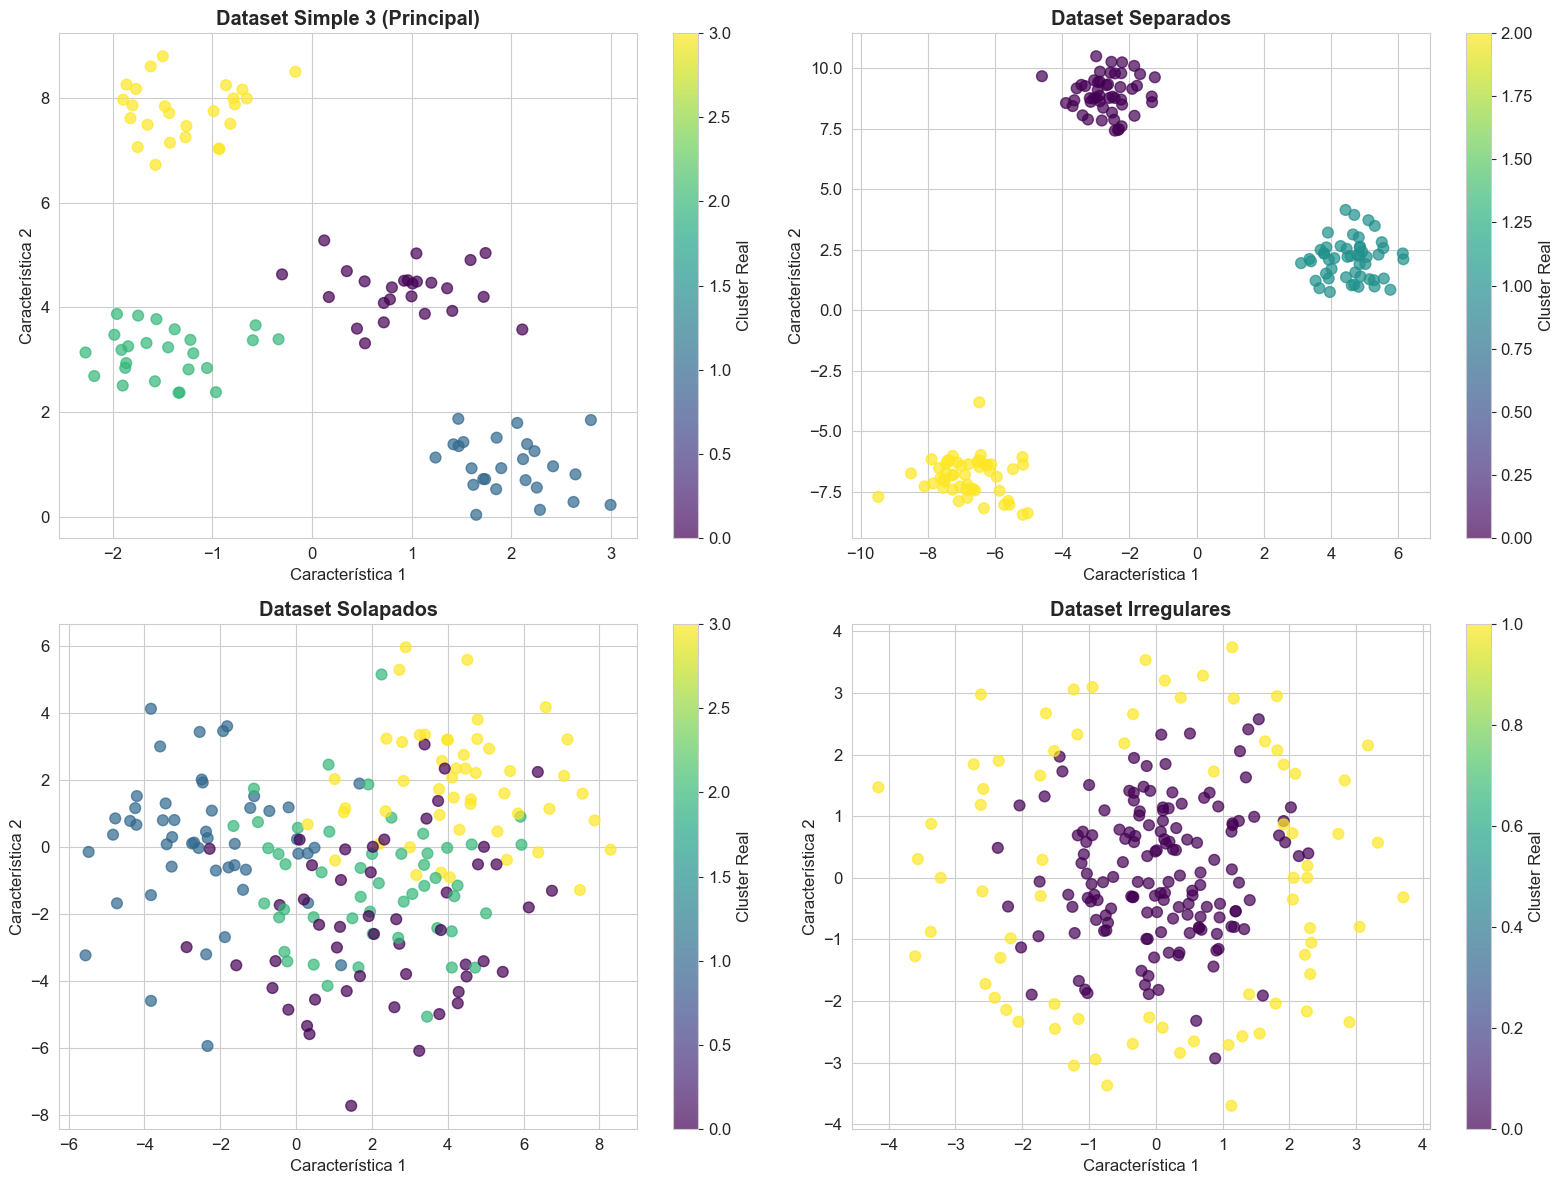

✅ Datos artificiales generados y visualizados


In [3]:
# ============================================================================
# 2. GENERACIÓN DE DATOS ARTIFICIALES
# ============================================================================

print("\n📊 2. GENERACIÓN DE DATOS ARTIFICIALES")
print("="*40)

# Dataset simple 3 como especifica el problema
np.random.seed(0)
X_simple, y_true = make_blobs(n_samples=100, n_features=2, centers=4, 
                             cluster_std=0.5, shuffle=True, random_state=0)

print("🎯 DATASET SIMPLE 3 GENERADO:")
print(f"   • Muestras: {X_simple.shape[0]}")
print(f"   • Características: {X_simple.shape[1]}")
print(f"   • Clusters reales: {len(np.unique(y_true))}")
print(f"   • Distribución por cluster: {np.bincount(y_true)}")

# Generar datasets adicionales para experimentación
datasets = {}

# Dataset 1: Clusters bien separados
X_separated, y_sep = make_blobs(n_samples=150, n_features=2, centers=3, 
                               cluster_std=0.8, center_box=(-10, 10), random_state=42)
datasets['Separados'] = (X_separated, y_sep)

# Dataset 2: Clusters solapados
X_overlap, y_over = make_blobs(n_samples=200, n_features=2, centers=4, 
                              cluster_std=2.0, center_box=(-5, 5), random_state=123)
datasets['Solapados'] = (X_overlap, y_over)

# Dataset 3: Clusters irregulares
np.random.seed(456)
n_samples = 150
X_irregular = np.random.randn(n_samples, 2)
# Crear forma de anillo
angles = np.linspace(0, 2*np.pi, n_samples//2)
radius = 3 + 0.5*np.random.randn(n_samples//2)
X_ring = np.column_stack([radius*np.cos(angles), radius*np.sin(angles)])
X_irregular = np.vstack([X_irregular, X_ring])
y_irreg = np.concatenate([np.zeros(n_samples), np.ones(n_samples//2)])
datasets['Irregulares'] = (X_irregular, y_irreg)

print(f"   • Datasets adicionales creados: {len(datasets)}")

# Visualización de datasets
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Dataset principal
ax = axes[0,0]
scatter = ax.scatter(X_simple[:, 0], X_simple[:, 1], c=y_true, cmap='viridis', alpha=0.7, s=60)
ax.set_title('Dataset Simple 3 (Principal)', fontweight='bold')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
plt.colorbar(scatter, ax=ax, label='Cluster Real')

# Datasets adicionales
for idx, (name, (X, y)) in enumerate(datasets.items()):
    row, col = divmod(idx + 1, 2)
    ax = axes[row, col]
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7, s=60)
    ax.set_title(f'Dataset {name}', fontweight='bold')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')
    plt.colorbar(scatter, ax=ax, label='Cluster Real')

plt.tight_layout()
plt.show()

print("✅ Datos artificiales generados y visualizados")


In [4]:
# ============================================================================
# 3. IMPLEMENTACIÓN DE LA CLASE ScratchKMeans
# ============================================================================

print("\n🏗️ 3. IMPLEMENTACIÓN DE ScratchKMeans")
print("="*40)

class ScratchKMeans():
    """
    Implementación desde cero del algoritmo K-means
    
    Parameters
    ----------
    n_clusters : int
        Número de clusters
    n_init : int, default=10
        Número de inicializaciones aleatorias
    max_iter : int, default=300
        Máximo número de iteraciones por ejecución
    tol : float, default=1e-4
        Tolerancia para determinar convergencia
    verbose : bool, default=False
        Si True, imprime el progreso
        
    Attributes
    ----------
    cluster_centers_ : ndarray, shape (n_clusters, n_features)
        Coordenadas de los centroides de los clusters
    labels_ : ndarray, shape (n_samples,)
        Etiquetas de cluster para cada muestra
    inertia_ : float
        Suma de cuadrados intra-cluster (SSE)
    n_iter_ : int
        Número de iteraciones ejecutadas
    """
    
    def __init__(self, n_clusters, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        # Validar parámetros
        if n_clusters <= 0:
            raise ValueError("n_clusters debe ser positivo")
        if n_init <= 0:
            raise ValueError("n_init debe ser positivo")
        if max_iter <= 0:
            raise ValueError("max_iter debe ser positivo")
        if tol <= 0:
            raise ValueError("tol debe ser positivo")
            
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
        # Atributos que se establecerán durante el entrenamiento
        self.cluster_centers_ = None
        self.labels_ = None
        self.inertia_ = None
        self.n_iter_ = None
        self._is_fitted = False
    
    def _initialize_centroids(self, X):
        """
        [Problema 1] Inicializar centroides aleatoriamente
        
        Selecciona k puntos de datos aleatoriamente como centroides iniciales
        """
        n_samples, n_features = X.shape
        
        # Seleccionar índices aleatorios sin reemplazo
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        
        # Usar los puntos seleccionados como centroides iniciales
        centroids = X[random_indices].copy()
        
        return centroids
    
    def _calculate_sse(self, X, centroids, labels):
        """
        [Problema 2] Calcular suma de errores cuadrados (SSE)
        
        SSE = Σₙ₌₁ᴺ Σₖ₌₁ᴷ wₙₖ ||xₙ - μₖ||²
        """
        sse = 0.0
        
        for k in range(self.n_clusters):
            # Encontrar puntos asignados al cluster k
            cluster_mask = labels == k
            
            if np.any(cluster_mask):
                # Calcular distancias cuadradas de puntos al centroide k
                cluster_points = X[cluster_mask]
                distances_squared = np.sum((cluster_points - centroids[k])**2, axis=1)
                sse += np.sum(distances_squared)
        
        return sse
    
    def _assign_clusters(self, X, centroids):
        """
        [Problema 3] Asignar cada punto al centroide más cercano
        
        Calcula la distancia euclidiana de cada punto a cada centroide
        y asigna al cluster del centroide más cercano
        """
        n_samples = X.shape[0]
        labels = np.zeros(n_samples, dtype=int)
        
        for i, point in enumerate(X):
            # Calcular distancias a todos los centroides
            distances = []
            for centroid in centroids:
                # Usar distancia euclidiana: ||point - centroid||
                distance = np.linalg.norm(point - centroid)
                distances.append(distance)
            
            # Asignar al cluster del centroide más cercano
            labels[i] = np.argmin(distances)
        
        return labels
    
    def _update_centroids(self, X, labels):
        """
        [Problema 4] Mover centroides al centroide de sus puntos asignados
        
        El nuevo centroide es la media aritmética de todos los puntos
        asignados al cluster
        """
        n_features = X.shape[1]
        new_centroids = np.zeros((self.n_clusters, n_features))
        
        for k in range(self.n_clusters):
            # Encontrar puntos asignados al cluster k
            cluster_mask = labels == k
            
            if np.any(cluster_mask):
                # Calcular media de puntos asignados
                cluster_points = X[cluster_mask]
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # Si no hay puntos asignados, mantener centroide anterior
                # (esto puede pasar en casos extremos)
                new_centroids[k] = self.cluster_centers_[k] if self.cluster_centers_ is not None else np.random.randn(n_features)
        
        return new_centroids
    
    def _has_converged(self, old_centroids, new_centroids):
        """
        Verificar si el algoritmo ha convergido
        
        Convergencia cuando la suma de diferencias entre centroides
        antiguos y nuevos es menor que la tolerancia
        """
        if old_centroids is None:
            return False
        
        # Calcular suma de diferencias
        centroid_shifts = np.sum(np.linalg.norm(new_centroids - old_centroids, axis=1))
        
        return centroid_shifts < self.tol
    
    def _single_kmeans_run(self, X):
        """
        [Problema 5] Ejecutar una sola corrida de K-means
        
        Repetir asignación de clusters y actualización de centroides
        hasta convergencia o máximo de iteraciones
        """
        # Inicializar centroides
        centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iter):
            # Guardar centroides anteriores para verificar convergencia
            old_centroids = centroids.copy()
            
            # Asignar clusters
            labels = self._assign_clusters(X, centroids)
            
            # Actualizar centroides
            centroids = self._update_centroids(X, labels)
            
            # Verificar convergencia
            if self._has_converged(old_centroids, centroids):
                if self.verbose:
                    print(f"    Convergencia alcanzada en iteración {iteration + 1}")
                break
        
        # Calcular SSE final
        final_labels = self._assign_clusters(X, centroids)
        sse = self._calculate_sse(X, centroids, final_labels)
        
        return centroids, final_labels, sse, iteration + 1
    
    def fit(self, X):
        """
        [Problema 6] Entrenar K-means con múltiples inicializaciones
        
        Ejecuta K-means n_init veces y selecciona el resultado
        con menor SSE
        """
        X = np.asarray(X, dtype=np.float64)
        
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        if X.shape[0] < self.n_clusters:
            raise ValueError("Número de muestras debe ser >= número de clusters")
        
        if self.verbose:
            print(f"🏃‍♂️ Entrenando K-means:")
            print(f"   • Muestras: {X.shape[0]}")
            print(f"   • Características: {X.shape[1]}")
            print(f"   • Clusters: {self.n_clusters}")
            print(f"   • Inicializaciones: {self.n_init}")
        
        best_centroids = None
        best_labels = None
        best_sse = float('inf')
        best_n_iter = 0
        
        # Ejecutar múltiples inicializaciones
        for init_run in range(self.n_init):
            if self.verbose:
                print(f"   Inicialización {init_run + 1}/{self.n_init}")
            
            # Ejecutar una corrida de K-means
            centroids, labels, sse, n_iter = self._single_kmeans_run(X)
            
            if self.verbose:
                print(f"     SSE: {sse:.6f}, Iteraciones: {n_iter}")
            
            # Guardar si es el mejor resultado hasta ahora
            if sse < best_sse:
                best_centroids = centroids
                best_labels = labels
                best_sse = sse
                best_n_iter = n_iter
        
        # Guardar mejores resultados
        self.cluster_centers_ = best_centroids
        self.labels_ = best_labels
        self.inertia_ = best_sse
        self.n_iter_ = best_n_iter
        self._is_fitted = True
        
        if self.verbose:
            print(f"✅ Entrenamiento completado:")
            print(f"   • Mejor SSE: {self.inertia_:.6f}")
            print(f"   • Iteraciones: {self.n_iter_}")
    
    def predict(self, X):
        """
        [Problema 7] Predecir clusters para nuevos datos
        
        Asigna cada punto al centroide más cercano
        """
        if not self._is_fitted:
            raise ValueError("El modelo debe ser entrenado antes de predecir. Usa fit() primero.")
        
        X = np.asarray(X, dtype=np.float64)
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        
        return self._assign_clusters(X, self.cluster_centers_)
    
    def fit_predict(self, X):
        """Entrenar el modelo y retornar las etiquetas de cluster"""
        self.fit(X)
        return self.labels_

print("🏗️ Clase ScratchKMeans implementada completamente")

# Información sobre la implementación
print(f"\n📋 CARACTERÍSTICAS DE LA IMPLEMENTACIÓN:")
print(f"   • ✅ Inicialización aleatoria de centroides")
print(f"   • ✅ Cálculo de SSE (suma de errores cuadrados)")
print(f"   • ✅ Asignación por distancia euclidiana mínima")
print(f"   • ✅ Actualización de centroides como media")
print(f"   • ✅ Criterios de convergencia configurables")
print(f"   • ✅ Múltiples inicializaciones para robustez")
print(f"   • ✅ Predicción para nuevos datos")
print(f"   • ✅ Validación robusta de inputs")

print("✅ Implementación completa de K-means scratch")



🏗️ 3. IMPLEMENTACIÓN DE ScratchKMeans
🏗️ Clase ScratchKMeans implementada completamente

📋 CARACTERÍSTICAS DE LA IMPLEMENTACIÓN:
   • ✅ Inicialización aleatoria de centroides
   • ✅ Cálculo de SSE (suma de errores cuadrados)
   • ✅ Asignación por distancia euclidiana mínima
   • ✅ Actualización de centroides como media
   • ✅ Criterios de convergencia configurables
   • ✅ Múltiples inicializaciones para robustez
   • ✅ Predicción para nuevos datos
   • ✅ Validación robusta de inputs
✅ Implementación completa de K-means scratch



🧪 4. PRUEBA DE IMPLEMENTACIÓN SCRATCH
🎯 PROBANDO CON DATASET SIMPLE:
🏃‍♂️ Entrenando K-means:
   • Muestras: 100
   • Características: 2
   • Clusters: 4
   • Inicializaciones: 10
   Inicialización 1/10
    Convergencia alcanzada en iteración 6
     SSE: 132.228756, Iteraciones: 6
   Inicialización 2/10
    Convergencia alcanzada en iteración 3
     SSE: 48.633783, Iteraciones: 3
   Inicialización 3/10
    Convergencia alcanzada en iteración 3
     SSE: 48.633783, Iteraciones: 3
   Inicialización 4/10
    Convergencia alcanzada en iteración 11
     SSE: 48.633783, Iteraciones: 11
   Inicialización 5/10
    Convergencia alcanzada en iteración 3
     SSE: 134.322887, Iteraciones: 3
   Inicialización 6/10
    Convergencia alcanzada en iteración 3
     SSE: 48.633783, Iteraciones: 3
   Inicialización 7/10
    Convergencia alcanzada en iteración 4
     SSE: 48.633783, Iteraciones: 4
   Inicialización 8/10
    Convergencia alcanzada en iteración 5
     SSE: 134.384858, Iteraciones: 5
   Ini

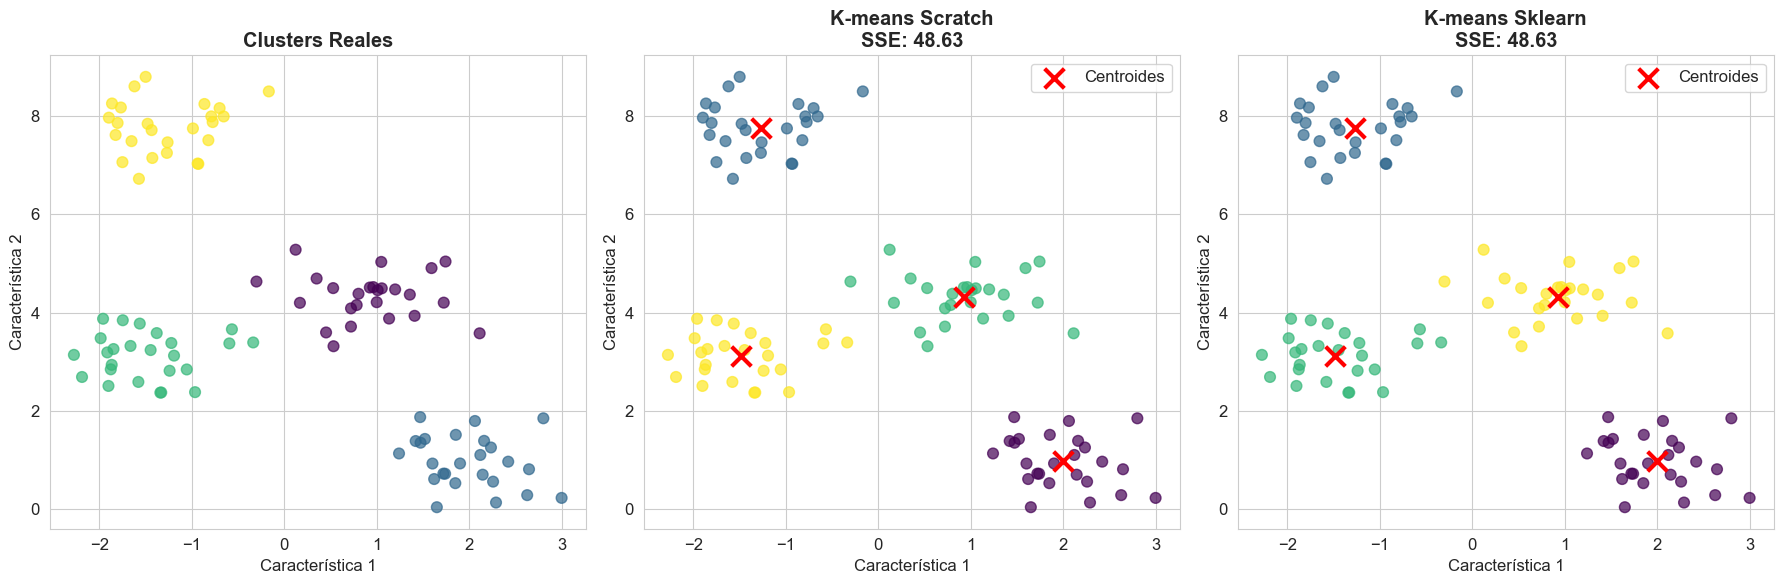


🔮 PRUEBA DE PREDICCIÓN:
   Puntos de prueba: [[0, 0], [5, 5], [-5, -5], [2, -2]]
   Predicciones scratch: [0 2 3 0]
   Predicciones sklearn: [0 3 2 0]
   Coincidencia: False
✅ Prueba de implementación scratch completada


In [5]:
# ============================================================================
# 4. PRUEBA DE LA IMPLEMENTACIÓN SCRATCH
# ============================================================================

print("\n🧪 4. PRUEBA DE IMPLEMENTACIÓN SCRATCH")
print("="*40)

# Probar con el dataset simple
print("🎯 PROBANDO CON DATASET SIMPLE:")

# Entrenar modelo scratch
kmeans_scratch = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, 
                              tol=1e-4, verbose=True)
kmeans_scratch.fit(X_simple)

# Obtener resultados
labels_scratch = kmeans_scratch.labels_
centroids_scratch = kmeans_scratch.cluster_centers_
sse_scratch = kmeans_scratch.inertia_

print(f"\n📊 RESULTADOS SCRATCH:")
print(f"   • SSE final: {sse_scratch:.4f}")
print(f"   • Iteraciones: {kmeans_scratch.n_iter_}")
print(f"   • Centroides shape: {centroids_scratch.shape}")
print(f"   • Labels shape: {labels_scratch.shape}")
print(f"   • Clusters únicos: {np.unique(labels_scratch)}")

# Comparar con scikit-learn
print(f"\n🔬 COMPARANDO CON SKLEARN:")
kmeans_sklearn = KMeans(n_clusters=4, n_init=10, max_iter=300, 
                       tol=1e-4, random_state=42)
kmeans_sklearn.fit(X_simple)

labels_sklearn = kmeans_sklearn.labels_
centroids_sklearn = kmeans_sklearn.cluster_centers_
sse_sklearn = kmeans_sklearn.inertia_

print(f"   SKLEARN:")
print(f"   • SSE: {sse_sklearn:.4f}")
print(f"   • Iteraciones: {kmeans_sklearn.n_iter_}")

print(f"   COMPARACIÓN:")
print(f"   • Diferencia SSE: {abs(sse_scratch - sse_sklearn):.4f}")
print(f"   • Diferencia relativa: {abs(sse_scratch - sse_sklearn)/sse_sklearn*100:.2f}%")

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Datos originales con clusters reales
axes[0].scatter(X_simple[:, 0], X_simple[:, 1], c=y_true, 
               cmap='viridis', alpha=0.7, s=60)
axes[0].set_title('Clusters Reales', fontweight='bold')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')

# Resultados scratch
scatter_scratch = axes[1].scatter(X_simple[:, 0], X_simple[:, 1], c=labels_scratch, 
                                 cmap='viridis', alpha=0.7, s=60)
axes[1].scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], 
               marker='x', s=200, linewidths=3, color='red', label='Centroides')
axes[1].set_title(f'K-means Scratch\nSSE: {sse_scratch:.2f}', fontweight='bold')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')
axes[1].legend()

# Resultados sklearn
scatter_sklearn = axes[2].scatter(X_simple[:, 0], X_simple[:, 1], c=labels_sklearn, 
                                 cmap='viridis', alpha=0.7, s=60)
axes[2].scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], 
               marker='x', s=200, linewidths=3, color='red', label='Centroides')
axes[2].set_title(f'K-means Sklearn\nSSE: {sse_sklearn:.2f}', fontweight='bold')
axes[2].set_xlabel('Característica 1')
axes[2].set_ylabel('Característica 2')
axes[2].legend()

plt.tight_layout()
plt.show()

# Prueba de predicción
print(f"\n🔮 PRUEBA DE PREDICCIÓN:")
# Crear algunos puntos de prueba
test_points = np.array([[0, 0], [5, 5], [-5, -5], [2, -2]])
predictions_scratch = kmeans_scratch.predict(test_points)
predictions_sklearn = kmeans_sklearn.predict(test_points)

print(f"   Puntos de prueba: {test_points.tolist()}")
print(f"   Predicciones scratch: {predictions_scratch}")
print(f"   Predicciones sklearn: {predictions_sklearn}")
print(f"   Coincidencia: {np.array_equal(predictions_scratch, predictions_sklearn)}")

print("✅ Prueba de implementación scratch completada")



📈 5. MÉTODO DEL CODO
📈 APLICANDO MÉTODO DEL CODO AL DATASET SIMPLE:
🔍 Calculando SSE para diferentes valores de k:
   k=1: SSE=870.26
   k=2: SSE=351.48
   k=3: SSE=139.17
   k=4: SSE=48.63
   k=5: SSE=43.29
   k=6: SSE=39.69
   k=7: SSE=34.60
   k=8: SSE=31.00
   k=9: SSE=28.54


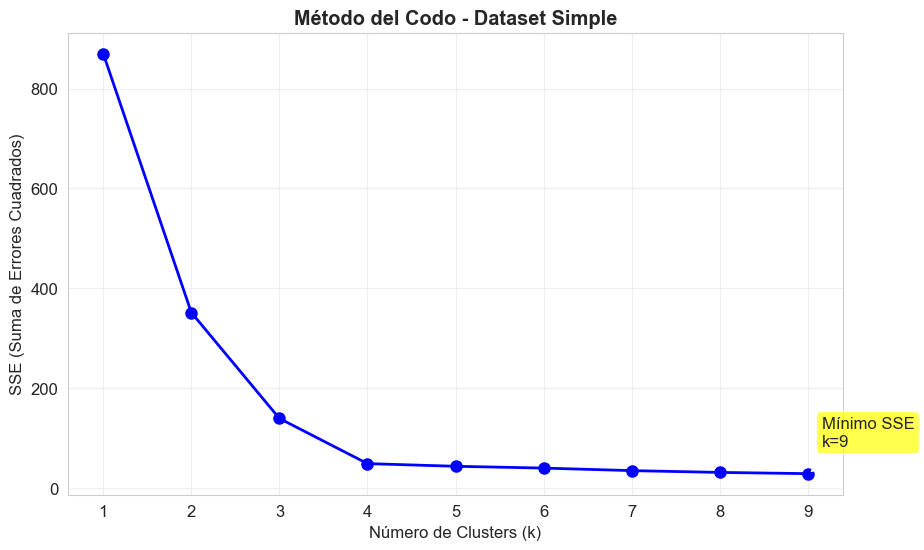

📍 PUNTO DEL CODO DETECTADO:
   • k óptimo sugerido: 2
   • SSE en k=2: 351.48

📊 ANÁLISIS DE REDUCCIÓN DE SSE:
   k=1 → k=2: Reducción 518.78 (59.6%)
   k=2 → k=3: Reducción 212.31 (60.4%)
   k=3 → k=4: Reducción 90.54 (65.1%)
   k=4 → k=5: Reducción 5.34 (11.0%)
   k=5 → k=6: Reducción 3.60 (8.3%)
   k=6 → k=7: Reducción 5.09 (12.8%)
   k=7 → k=8: Reducción 3.60 (10.4%)
   k=8 → k=9: Reducción 2.46 (7.9%)

🎯 COMPARACIÓN:
   • k real: 4
   • k sugerido por codo: 2
   • SSE con k real: 48.63
✅ Método del codo implementado y aplicado


In [6]:
# ============================================================================
# 5. MÉTODO DEL CODO (ELBOW METHOD)
# ============================================================================

print("\n📈 5. MÉTODO DEL CODO")
print("="*25)

def elbow_method(X, k_range=range(1, 11), n_init=10, max_iter=300):
    """
    [Problema 8] Implementar método del codo para seleccionar k óptimo
    
    Parameters
    ----------
    X : ndarray
        Datos para clustering
    k_range : range
        Rango de valores k a probar
    
    Returns
    -------
    sse_values : list
        Valores de SSE para cada k
    """
    sse_values = []
    
    print("🔍 Calculando SSE para diferentes valores de k:")
    
    for k in k_range:
        if k == 1:
            # Para k=1, SSE es la suma de distancias al centroide general
            centroid = np.mean(X, axis=0)
            sse = np.sum(np.linalg.norm(X - centroid, axis=1)**2)
        else:
            # Usar nuestro K-means scratch
            kmeans = ScratchKMeans(n_clusters=k, n_init=n_init, 
                                 max_iter=max_iter, verbose=False)
            kmeans.fit(X)
            sse = kmeans.inertia_
        
        sse_values.append(sse)
        print(f"   k={k}: SSE={sse:.2f}")
    
    return list(k_range), sse_values

def plot_elbow_curve(k_values, sse_values, title="Método del Codo"):
    """
    Visualizar curva del codo
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse_values, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('SSE (Suma de Errores Cuadrados)')
    plt.title(title, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Resaltar algunos puntos clave
    min_sse_idx = np.argmin(sse_values)
    plt.annotate(f'Mínimo SSE\nk={k_values[min_sse_idx]}', 
                xy=(k_values[min_sse_idx], sse_values[min_sse_idx]),
                xytext=(10, 20), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.show()

def find_elbow_point(k_values, sse_values):
    """
    Encontrar punto del codo usando método de la segunda derivada
    """
    # Calcular diferencias
    first_diff = np.diff(sse_values)
    second_diff = np.diff(first_diff)
    
    # El codo está donde la segunda derivada es máxima
    elbow_idx = np.argmax(second_diff) + 1  # +1 porque diff reduce dimensión
    elbow_k = k_values[elbow_idx]
    
    return elbow_k, second_diff

print("📈 APLICANDO MÉTODO DEL CODO AL DATASET SIMPLE:")

# Aplicar método del codo
k_range = range(1, 10)
k_values, sse_values = elbow_method(X_simple, k_range, n_init=5)

# Visualizar curva del codo
plot_elbow_curve(k_values, sse_values, "Método del Codo - Dataset Simple")

# Encontrar punto del codo automáticamente
elbow_k, second_derivatives = find_elbow_point(k_values, sse_values)
print(f"📍 PUNTO DEL CODO DETECTADO:")
print(f"   • k óptimo sugerido: {elbow_k}")
print(f"   • SSE en k={elbow_k}: {sse_values[elbow_k-1]:.2f}")

# Análisis de la reducción de SSE
print(f"\n📊 ANÁLISIS DE REDUCCIÓN DE SSE:")
for i in range(1, len(sse_values)):
    reduction = sse_values[i-1] - sse_values[i]
    reduction_pct = (reduction / sse_values[i-1]) * 100
    print(f"   k={i} → k={i+1}: Reducción {reduction:.2f} ({reduction_pct:.1f}%)")

# Comparar con k real
k_real = len(np.unique(y_true))
print(f"\n🎯 COMPARACIÓN:")
print(f"   • k real: {k_real}")
print(f"   • k sugerido por codo: {elbow_k}")
print(f"   • SSE con k real: {sse_values[k_real-1]:.2f}")

print("✅ Método del codo implementado y aplicado")



👤 6. ANÁLISIS DE SILUETA
👤 ANÁLISIS DE SILUETA PARA DIFERENTES VALORES DE k:

🔍 Analizando k=2:


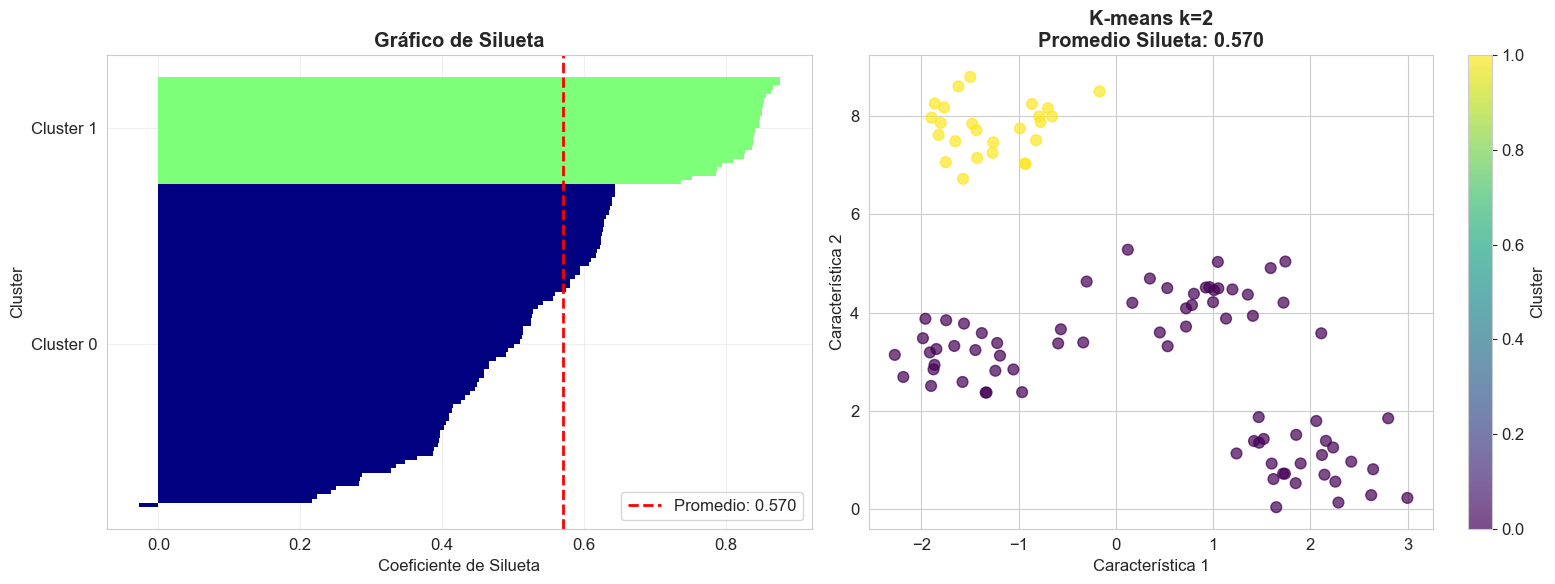

   • Promedio silueta: 0.5703
   • Rango silueta: [-0.028, 0.876]
   • Std silueta: 0.190

🔍 Analizando k=3:


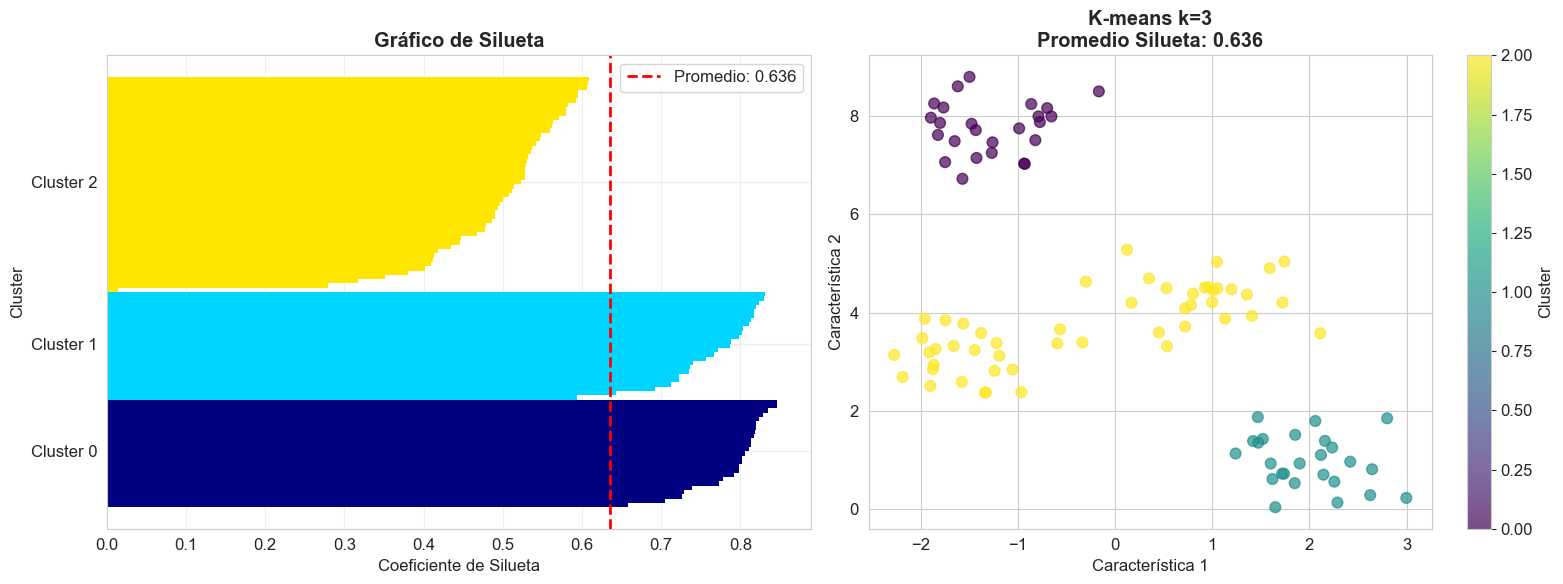

   • Promedio silueta: 0.6357
   • Rango silueta: [0.014, 0.847]
   • Std silueta: 0.164

🔍 Analizando k=4:


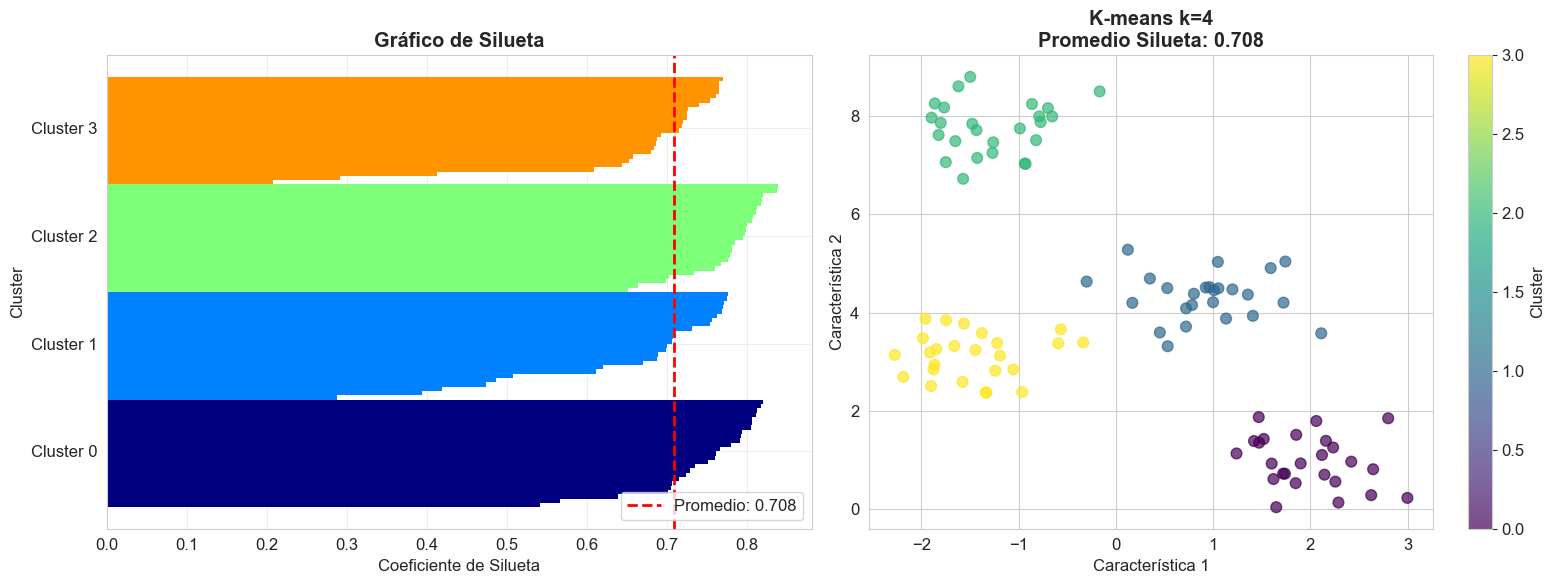

   • Promedio silueta: 0.7084
   • Rango silueta: [0.208, 0.838]
   • Std silueta: 0.120

🔍 Analizando k=5:


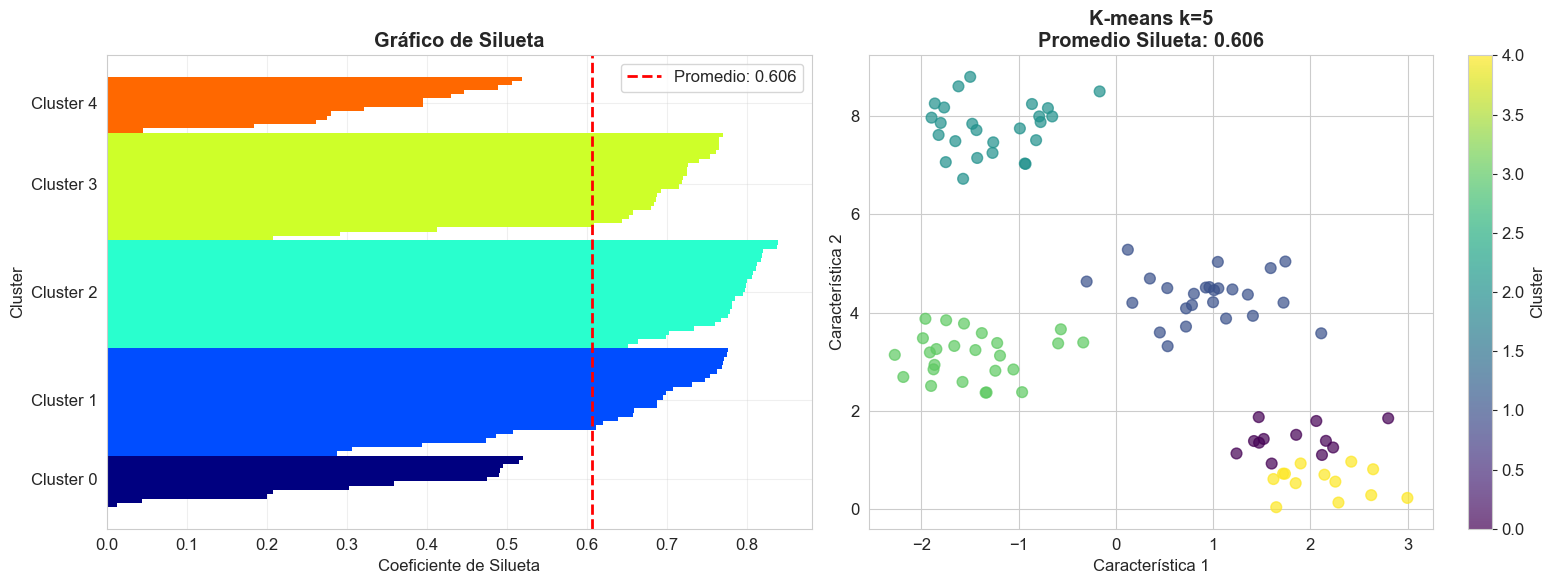

   • Promedio silueta: 0.6061
   • Rango silueta: [0.012, 0.838]
   • Std silueta: 0.205

🔍 Analizando k=6:


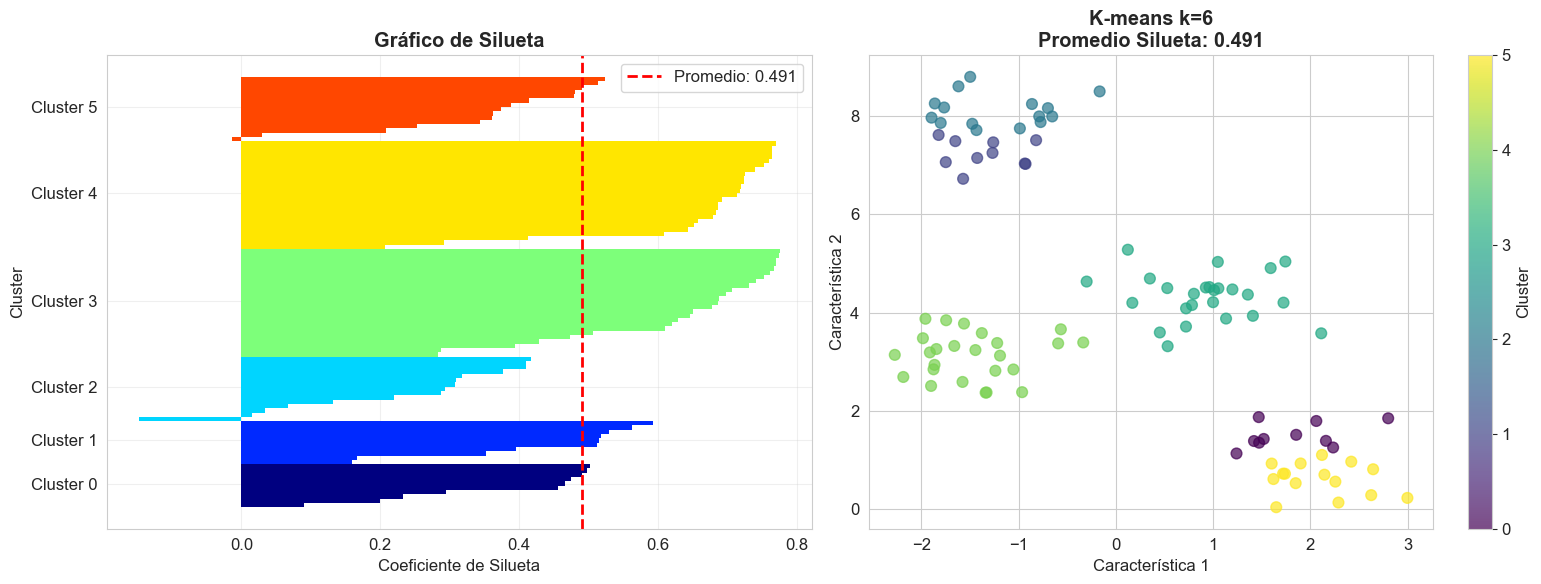

   • Promedio silueta: 0.4907
   • Rango silueta: [-0.148, 0.776]
   • Std silueta: 0.224

🔍 Analizando k=7:


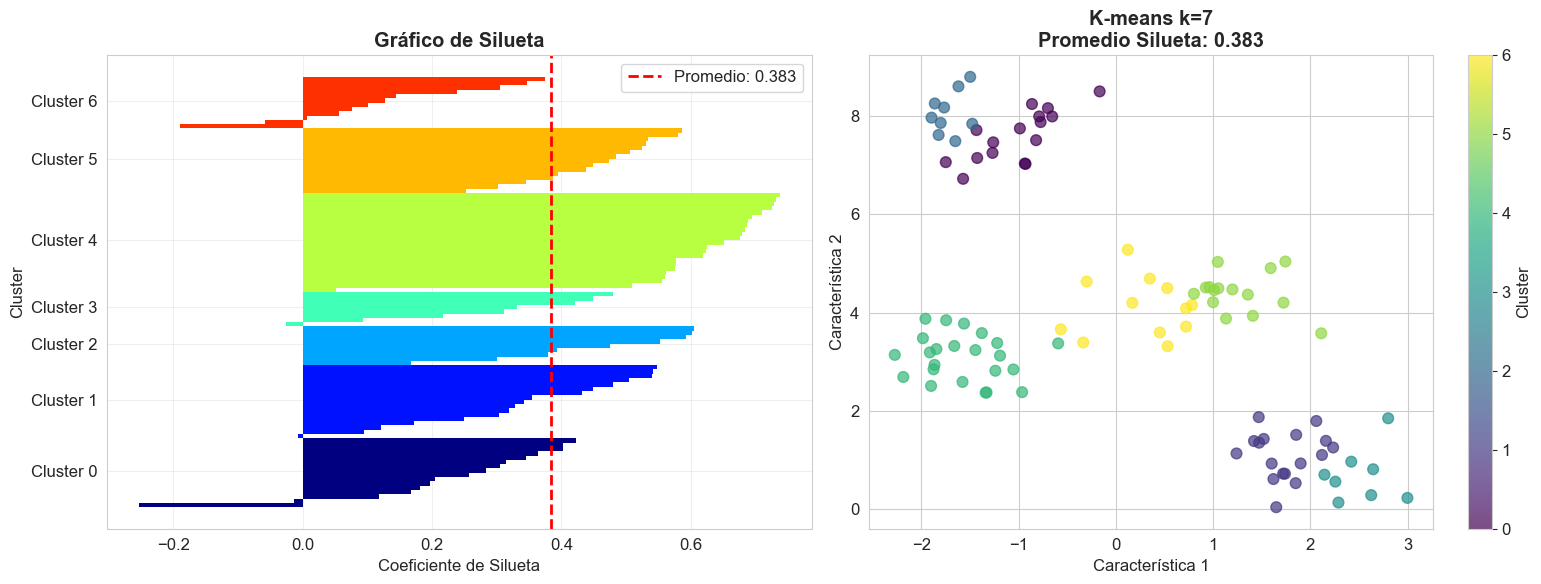

   • Promedio silueta: 0.3835
   • Rango silueta: [-0.253, 0.737]
   • Std silueta: 0.221


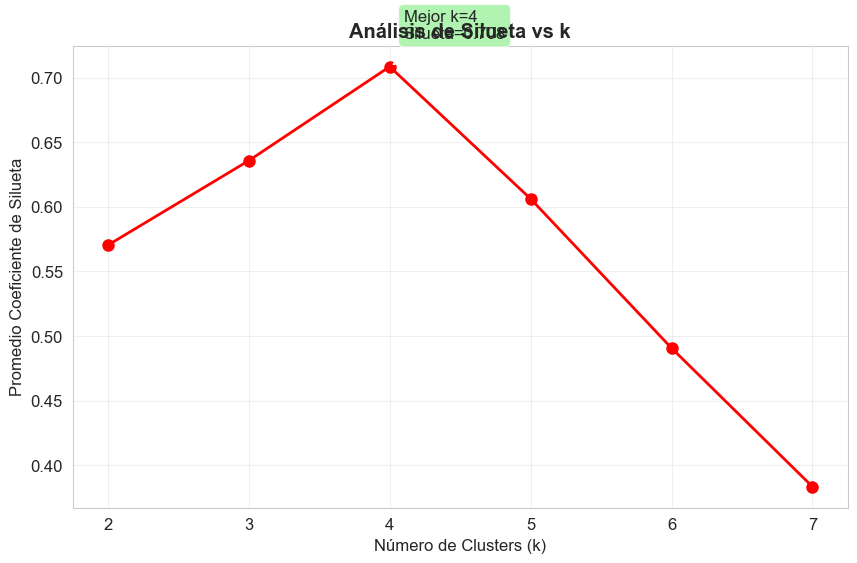


🏆 MEJOR k SEGÚN SILUETA:
   • k óptimo: 4
   • Promedio silueta: 0.7084

📊 INTERPRETACIÓN DE SILUETA:
   • > 0.7: Estructura de clusters fuerte
   • 0.5-0.7: Estructura razonable
   • 0.25-0.5: Estructura débil, puede haber solapamiento
   • < 0.25: No hay estructura clara de clusters
   • Interpretación para k=4: Excelente estructura de clusters
✅ Análisis de silueta completado


In [7]:
# ============================================================================
# 6. ANÁLISIS DE SILUETA
# ============================================================================

print("\n👤 6. ANÁLISIS DE SILUETA")
print("="*30)

def calculate_silhouette_scratch(X, labels):
    """
    [Problema 9] Calcular coeficientes de silueta desde cero
    
    Para cada punto i: s_i = (b_i - a_i) / max(a_i, b_i)
    
    Donde:
    - a_i: distancia media a otros puntos en el mismo cluster (cohesión)
    - b_i: distancia media al cluster más cercano (separación)
    """
    n_samples = len(X)
    silhouette_values = np.zeros(n_samples)
    
    unique_labels = np.unique(labels)
    
    for i, point in enumerate(X):
        current_cluster = labels[i]
        
        # Calcular a_i (cohesión)
        same_cluster_mask = (labels == current_cluster) & (np.arange(n_samples) != i)
        
        if np.any(same_cluster_mask):
            same_cluster_points = X[same_cluster_mask]
            a_i = np.mean([np.linalg.norm(point - other_point) 
                          for other_point in same_cluster_points])
        else:
            # Si solo hay un punto en el cluster
            a_i = 0
        
        # Calcular b_i (separación al cluster más cercano)
        min_avg_distance = float('inf')
        
        for other_cluster in unique_labels:
            if other_cluster != current_cluster:
                other_cluster_mask = labels == other_cluster
                other_cluster_points = X[other_cluster_mask]
                
                if len(other_cluster_points) > 0:
                    avg_distance = np.mean([np.linalg.norm(point - other_point) 
                                          for other_point in other_cluster_points])
                    min_avg_distance = min(min_avg_distance, avg_distance)
        
        b_i = min_avg_distance
        
        # Calcular coeficiente de silueta
        if max(a_i, b_i) > 0:
            silhouette_values[i] = (b_i - a_i) / max(a_i, b_i)
        else:
            silhouette_values[i] = 0
    
    return silhouette_values

def plot_silhouette_analysis(X, labels, title="Análisis de Silueta"):
    """
    Visualizar análisis de silueta con el código proporcionado (adaptado)
    """
    # Calcular coeficientes de silueta
    silhouette_vals = calculate_silhouette_scratch(X, labels)
    silhouette_avg = np.mean(silhouette_vals)
    
    # Preparar datos para visualización
    unique_labels = np.unique(labels)
    cluster_labels = [f'Cluster {i}' for i in unique_labels]
    n_clusters = len(unique_labels)
    
    # Crear figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico de silueta (código adaptado del proporcionado)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(unique_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        ax1.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, 
                height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    
    ax1.axvline(silhouette_avg, color="red", linestyle="--", linewidth=2, 
               label=f'Promedio: {silhouette_avg:.3f}')
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([f'Cluster {i}' for i in unique_labels])
    ax1.set_ylabel('Cluster')
    ax1.set_xlabel('Coeficiente de Silueta')
    ax1.set_title('Gráfico de Silueta', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Scatter plot de clusters
    scatter = ax2.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', 
                         alpha=0.7, s=60)
    ax2.set_xlabel('Característica 1')
    ax2.set_ylabel('Característica 2')
    ax2.set_title(f'{title}\nPromedio Silueta: {silhouette_avg:.3f}', fontweight='bold')
    plt.colorbar(scatter, ax=ax2, label='Cluster')
    
    plt.tight_layout()
    plt.show()
    
    return silhouette_vals, silhouette_avg

print("👤 ANÁLISIS DE SILUETA PARA DIFERENTES VALORES DE k:")

# Analizar silueta para diferentes k
k_range_silhouette = range(2, 8)  # Silueta no se define para k=1
silhouette_averages = []

for k in k_range_silhouette:
    print(f"\n🔍 Analizando k={k}:")
    
    # Entrenar K-means
    kmeans = ScratchKMeans(n_clusters=k, n_init=5, max_iter=200, verbose=False)
    cluster_labels = kmeans.fit_predict(X_simple)
    
    # Calcular silueta
    silhouette_vals, silhouette_avg = plot_silhouette_analysis(
        X_simple, cluster_labels, f"K-means k={k}")
    
    silhouette_averages.append(silhouette_avg)
    print(f"   • Promedio silueta: {silhouette_avg:.4f}")
    
    # Análisis detallado
    print(f"   • Rango silueta: [{np.min(silhouette_vals):.3f}, {np.max(silhouette_vals):.3f}]")
    print(f"   • Std silueta: {np.std(silhouette_vals):.3f}")

# Gráfico comparativo de promedios de silueta
plt.figure(figsize=(10, 6))
plt.plot(list(k_range_silhouette), silhouette_averages, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Promedio Coeficiente de Silueta')
plt.title('Análisis de Silueta vs k', fontweight='bold')
plt.grid(True, alpha=0.3)

# Resaltar mejor k
best_k_idx = np.argmax(silhouette_averages)
best_k = list(k_range_silhouette)[best_k_idx]
best_silhouette = silhouette_averages[best_k_idx]

plt.annotate(f'Mejor k={best_k}\nSilueta={best_silhouette:.3f}', 
            xy=(best_k, best_silhouette),
            xytext=(10, 20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()

print(f"\n🏆 MEJOR k SEGÚN SILUETA:")
print(f"   • k óptimo: {best_k}")
print(f"   • Promedio silueta: {best_silhouette:.4f}")

# Interpretación de valores de silueta
print(f"\n📊 INTERPRETACIÓN DE SILUETA:")
print(f"   • > 0.7: Estructura de clusters fuerte")
print(f"   • 0.5-0.7: Estructura razonable")
print(f"   • 0.25-0.5: Estructura débil, puede haber solapamiento")
print(f"   • < 0.25: No hay estructura clara de clusters")

if best_silhouette > 0.7:
    interpretation = "Excelente estructura de clusters"
elif best_silhouette > 0.5:
    interpretation = "Buena estructura de clusters"
elif best_silhouette > 0.25:
    interpretation = "Estructura moderada, posible solapamiento"
else:
    interpretation = "Estructura débil o ausente"

print(f"   • Interpretación para k={best_k}: {interpretation}")

print("✅ Análisis de silueta completado")



🏢 7. ANÁLISIS DE DATOS REALES - CLIENTES MAYORISTAS
📊 GENERANDO DATOS SIMULADOS DE CLIENTES MAYORISTAS:
   • Clientes totales: 440
   • Características: 8
   • Canales: {2: 303, 1: 137}
   • Regiones: {1: 276, 2: 114, 3: 50}

📋 PRIMERAS FILAS DEL DATASET:
   Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       1   2627  11144      199    1099             16090   
1        2       3  10576   2720     1047    2786             12810   
2        2       1  17732   5061    11028    2293              3469   
3        2       1    130    893     2330     268              2002   
4        1       2  13679  26782    10204    8365              3904   

   Delicassen  
0        1966  
1       19358  
2       22665  
3        8747  
4        5252  

📈 ESTADÍSTICAS DESCRIPTIVAS:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.688636    1.486364   15816.

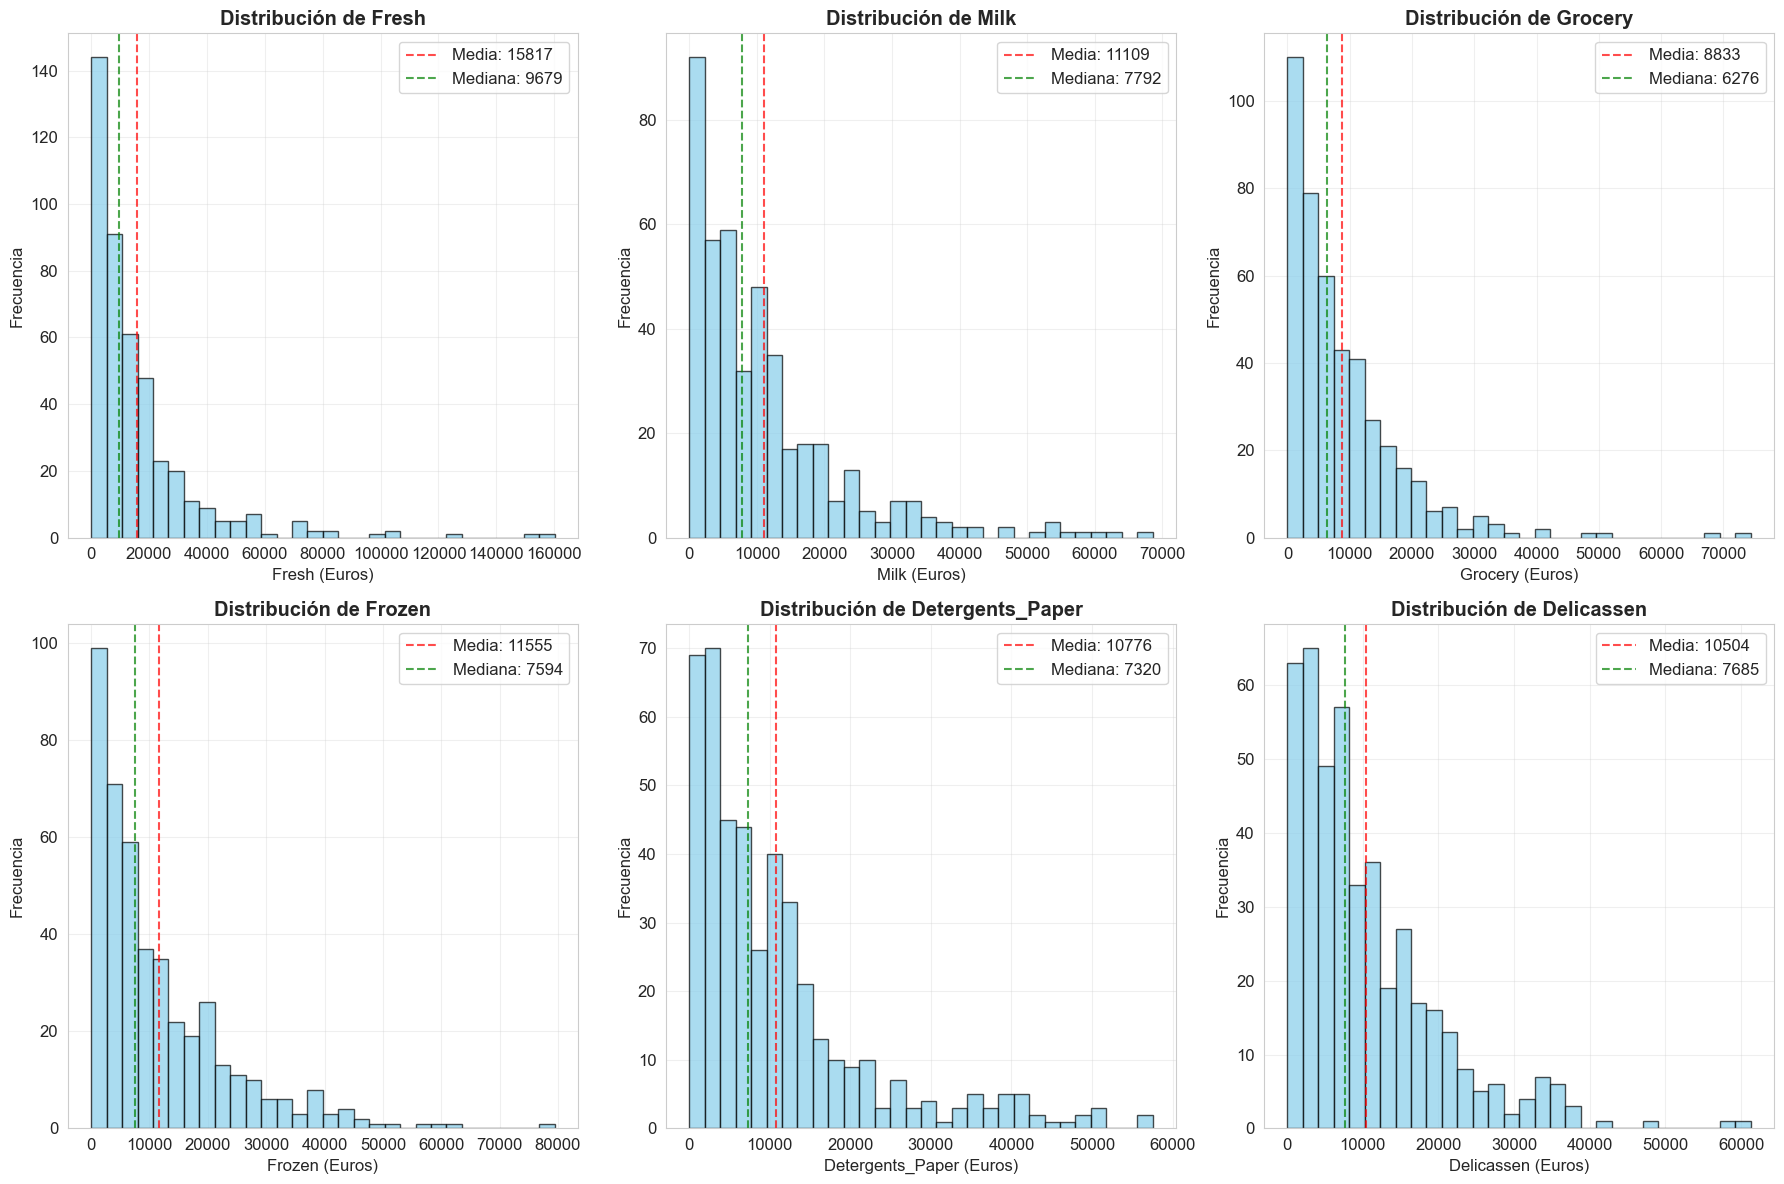

✅ Datos de clientes mayoristas cargados y explorados


In [8]:
# ============================================================================
# 7. ANÁLISIS DE DATOS REALES - CLIENTES MAYORISTAS
# ============================================================================

print("\n🏢 7. ANÁLISIS DE DATOS REALES - CLIENTES MAYORISTAS")
print("="*60)

# Simular datos de clientes mayoristas (ya que no tenemos el CSV real)
print("📊 GENERANDO DATOS SIMULADOS DE CLIENTES MAYORISTAS:")

# Crear datos similares al dataset real
np.random.seed(42)
n_customers = 440

# Generar datos con patrones realistas
# Canales: 1=Hotel/Restaurant/Cafe, 2=Retail
channels = np.random.choice([1, 2], n_customers, p=[0.3, 0.7])

# Regiones: 1=Lisboa, 2=Oporto, 3=Otras
regions = np.random.choice([1, 2, 3], n_customers, p=[0.6, 0.3, 0.1])

# Productos con correlaciones realistas
# Los hoteles gastan más en Fresh y Frozen, menos en Grocery
base_spending = np.random.exponential(scale=10000, size=(n_customers, 6))

# Ajustar según canal
hotel_mask = channels == 1
base_spending[hotel_mask, 0] *= 2.5  # Fresh
base_spending[hotel_mask, 1] *= 1.2  # Milk
base_spending[hotel_mask, 2] *= 0.6  # Grocery
base_spending[hotel_mask, 3] *= 2.0  # Frozen
base_spending[hotel_mask, 4] *= 1.3  # Detergents_Paper
base_spending[hotel_mask, 5] *= 1.1  # Delicassen

# Crear DataFrame
wholesale_data = pd.DataFrame({
    'Channel': channels,
    'Region': regions,
    'Fresh': base_spending[:, 0].astype(int),
    'Milk': base_spending[:, 1].astype(int),
    'Grocery': base_spending[:, 2].astype(int),
    'Frozen': base_spending[:, 3].astype(int),
    'Detergents_Paper': base_spending[:, 4].astype(int),
    'Delicassen': base_spending[:, 5].astype(int)
})

print(f"   • Clientes totales: {len(wholesale_data)}")
print(f"   • Características: {wholesale_data.shape[1]}")
print(f"   • Canales: {wholesale_data['Channel'].value_counts().to_dict()}")
print(f"   • Regiones: {wholesale_data['Region'].value_counts().to_dict()}")

# Mostrar primeras filas y estadísticas
print(f"\n📋 PRIMERAS FILAS DEL DATASET:")
print(wholesale_data.head())

print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print(wholesale_data.describe())

# Preparar datos para clustering (excluir Channel y Region)
spending_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X_wholesale = wholesale_data[spending_features].values

print(f"\n🔧 DATOS PARA CLUSTERING:")
print(f"   • Shape: {X_wholesale.shape}")
print(f"   • Características utilizadas: {spending_features}")

# Estandarizar datos
scaler = StandardScaler()
X_wholesale_scaled = scaler.fit_transform(X_wholesale)

print(f"   • Datos estandarizados: ✅")

# Análisis exploratorio
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(spending_features):
    ax = axes[i]
    
    # Histograma
    ax.hist(wholesale_data[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_xlabel(f'{feature} (Euros)')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {feature}', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Agregar estadísticas
    mean_val = wholesale_data[feature].mean()
    median_val = wholesale_data[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_val:.0f}')
    ax.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Mediana: {median_val:.0f}')
    ax.legend()

plt.tight_layout()
plt.show()

print("✅ Datos de clientes mayoristas cargados y explorados")



📉 8. REDUCCIÓN DE DIMENSIONALIDAD CON PCA
🔍 APLICANDO PCA PARA VISUALIZACIÓN:
   • Componentes principales: 2
   • Shape después de PCA: (440, 2)
   • Varianza explicada por componente: [0.20120734 0.18056616]
   • Varianza explicada total: 0.3818

📊 ANÁLISIS COMPLETO DE VARIANZA EXPLICADA:
   • PC1: 0.2012 (acumulado: 0.2012)
   • PC2: 0.1806 (acumulado: 0.3818)
   • PC3: 0.1657 (acumulado: 0.5474)
   • PC4: 0.1602 (acumulado: 0.7077)
   • PC5: 0.1479 (acumulado: 0.8556)
   • PC6: 0.1444 (acumulado: 1.0000)


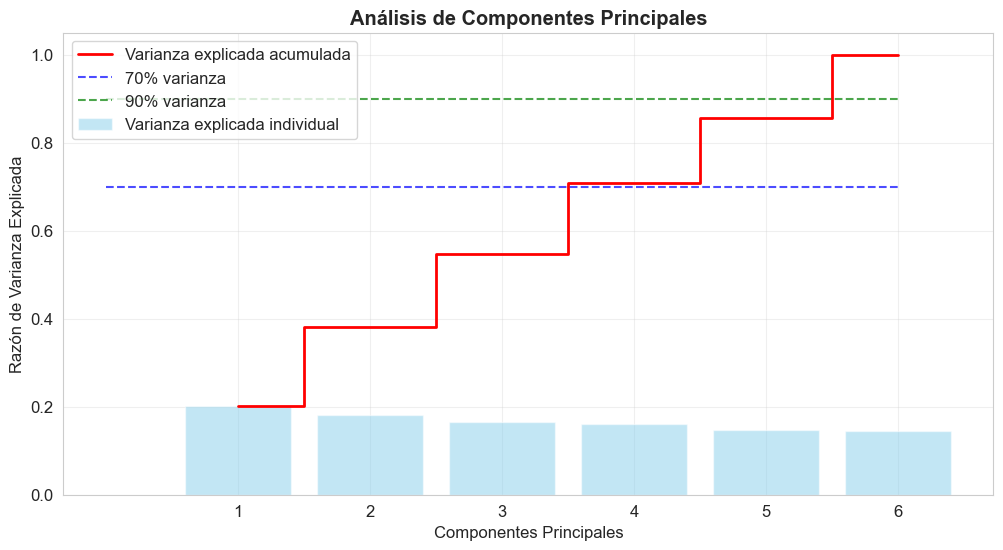

📍 COMPONENTES NECESARIOS:
   • Para 70% varianza: 4 componentes
   • Para 90% varianza: 6 componentes
   • Usando 2 componentes: 38.2% varianza explicada


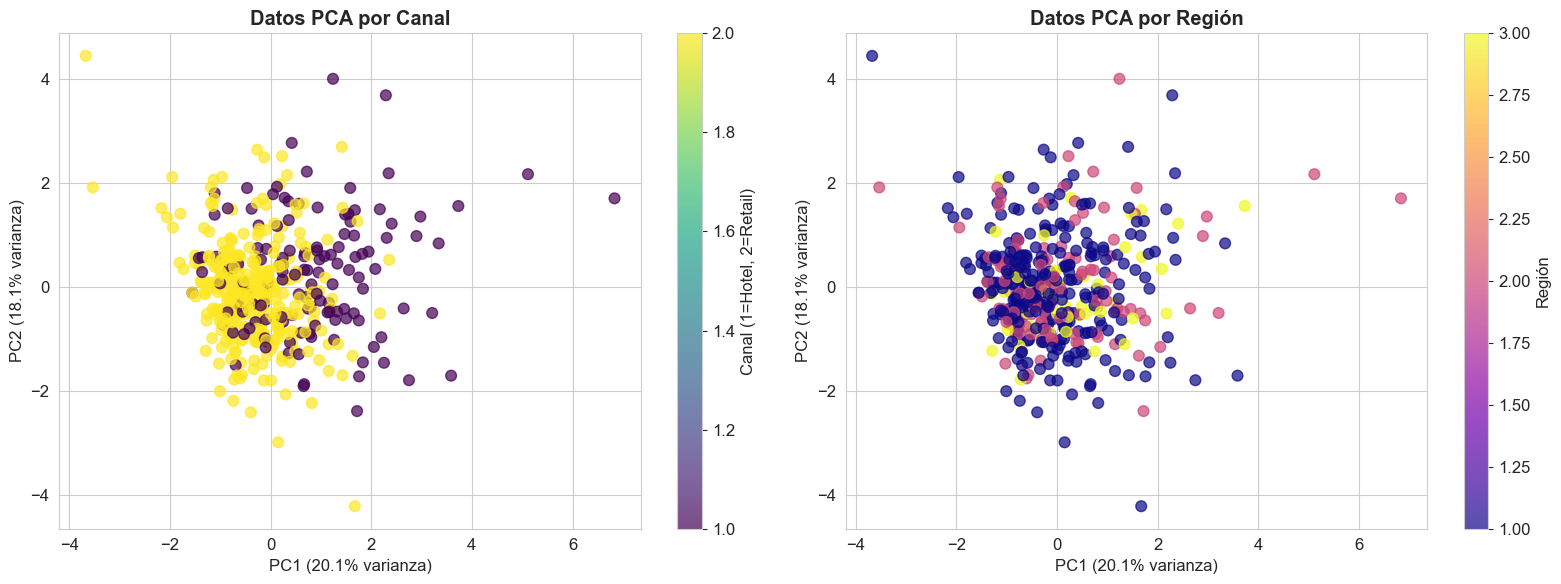


🔍 INTERPRETACIÓN DE COMPONENTES PRINCIPALES:
   Cargas de los componentes:
                       PC1       PC2
Fresh             0.577510  0.266292
Milk              0.411067  0.315092
Grocery          -0.381035  0.381512
Frozen            0.575458 -0.155230
Detergents_Paper  0.043906  0.605246
Delicassen        0.138704 -0.542066


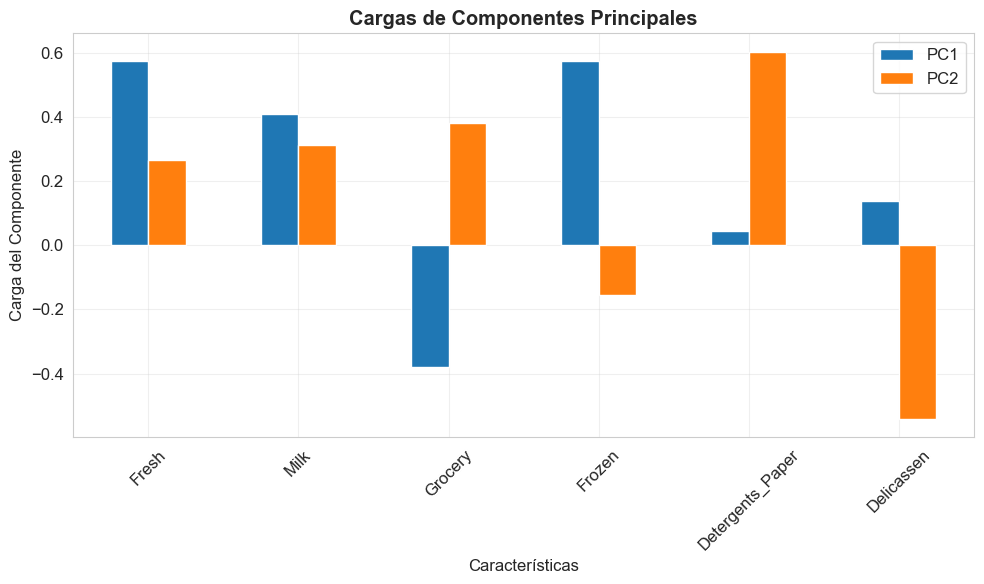

📝 INTERPRETACIÓN:
   • PC1: Explica 20.1% - componente de gasto general
   • PC2: Explica 18.1% - contraste entre tipos de productos
✅ PCA aplicado y analizado


In [9]:
# ============================================================================
# 8. REDUCCIÓN DE DIMENSIONALIDAD CON PCA
# ============================================================================

print("\n📉 8. REDUCCIÓN DE DIMENSIONALIDAD CON PCA")
print("="*45)

# Aplicar PCA como se especifica en el problema
print("🔍 APLICANDO PCA PARA VISUALIZACIÓN:")

# PCA con 2 componentes para visualización
pca_2d = PCA(n_components=2)
pca_2d.fit(X_wholesale_scaled)
X_wholesale_pca = pca_2d.transform(X_wholesale_scaled)

print(f"   • Componentes principales: 2")
print(f"   • Shape después de PCA: {X_wholesale_pca.shape}")
print(f"   • Varianza explicada por componente: {pca_2d.explained_variance_ratio_}")
print(f"   • Varianza explicada total: {pca_2d.explained_variance_ratio_.sum():.4f}")

# Análisis completo de varianza explicada (código proporcionado adaptado)
pca_full = PCA(n_components=None)
pca_full.fit(X_wholesale_scaled)
var_exp = pca_full.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

print(f"\n📊 ANÁLISIS COMPLETO DE VARIANZA EXPLICADA:")
for i, (individual, cumulative) in enumerate(zip(var_exp, cum_var_exp)):
    print(f"   • PC{i+1}: {individual:.4f} (acumulado: {cumulative:.4f})")

# Visualizar varianza explicada
plt.figure(figsize=(12, 6))

plt.bar(range(1, 7), var_exp, alpha=0.5, align='center', 
        label='Varianza explicada individual', color='skyblue')
plt.step(range(1, 7), cum_var_exp, where='mid', 
         label='Varianza explicada acumulada', linewidth=2, color='red')

plt.ylabel('Razón de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Análisis de Componentes Principales', fontweight='bold')
plt.hlines(0.7, 0, 6, "blue", linestyles='dashed', alpha=0.7, 
           label='70% varianza')
plt.hlines(0.9, 0, 6, "green", linestyles='dashed', alpha=0.7, 
           label='90% varianza')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 7))
plt.show()

# Determinar número óptimo de componentes
components_70 = np.where(cum_var_exp >= 0.7)[0][0] + 1
components_90 = np.where(cum_var_exp >= 0.9)[0][0] + 1

print(f"📍 COMPONENTES NECESARIOS:")
print(f"   • Para 70% varianza: {components_70} componentes")
print(f"   • Para 90% varianza: {components_90} componentes")
print(f"   • Usando 2 componentes: {cum_var_exp[1]:.1%} varianza explicada")

# Visualizar datos en 2D después de PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Datos PCA coloreados por canal
scatter1 = axes[0].scatter(X_wholesale_pca[:, 0], X_wholesale_pca[:, 1], 
                          c=wholesale_data['Channel'], cmap='viridis', 
                          alpha=0.7, s=60)
axes[0].set_xlabel(f'PC1 ({var_exp[0]:.1%} varianza)')
axes[0].set_ylabel(f'PC2 ({var_exp[1]:.1%} varianza)')
axes[0].set_title('Datos PCA por Canal', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Canal (1=Hotel, 2=Retail)')

# Datos PCA coloreados por región
scatter2 = axes[1].scatter(X_wholesale_pca[:, 0], X_wholesale_pca[:, 1], 
                          c=wholesale_data['Region'], cmap='plasma', 
                          alpha=0.7, s=60)
axes[1].set_xlabel(f'PC1 ({var_exp[0]:.1%} varianza)')
axes[1].set_ylabel(f'PC2 ({var_exp[1]:.1%} varianza)')
axes[1].set_title('Datos PCA por Región', fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Región')

plt.tight_layout()
plt.show()

# Análisis de componentes principales
print(f"\n🔍 INTERPRETACIÓN DE COMPONENTES PRINCIPALES:")
components_df = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=spending_features
)

print("   Cargas de los componentes:")
print(components_df)

# Visualizar cargas
plt.figure(figsize=(10, 6))
components_df.plot(kind='bar', ax=plt.gca())
plt.title('Cargas de Componentes Principales', fontweight='bold')
plt.xlabel('Características')
plt.ylabel('Carga del Componente')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📝 INTERPRETACIÓN:")
print(f"   • PC1: Explica {var_exp[0]:.1%} - componente de gasto general")
print(f"   • PC2: Explica {var_exp[1]:.1%} - contraste entre tipos de productos")

print("✅ PCA aplicado y analizado")



🎯 9. SELECCIÓN ÓPTIMA DE k - DATOS MAYORISTAS
[Problema 10] Selección del número óptimo de clusters k

📈 MÉTODO DEL CODO EN DATOS PCA:
🔍 Calculando SSE para diferentes valores de k:
   k=1: SSE=1007.88
   k=2: SSE=685.02
   k=3: SSE=487.87
   k=4: SSE=392.72
   k=5: SSE=328.86
   k=6: SSE=281.37
   k=7: SSE=245.39
   k=8: SSE=219.87
   k=9: SSE=199.58


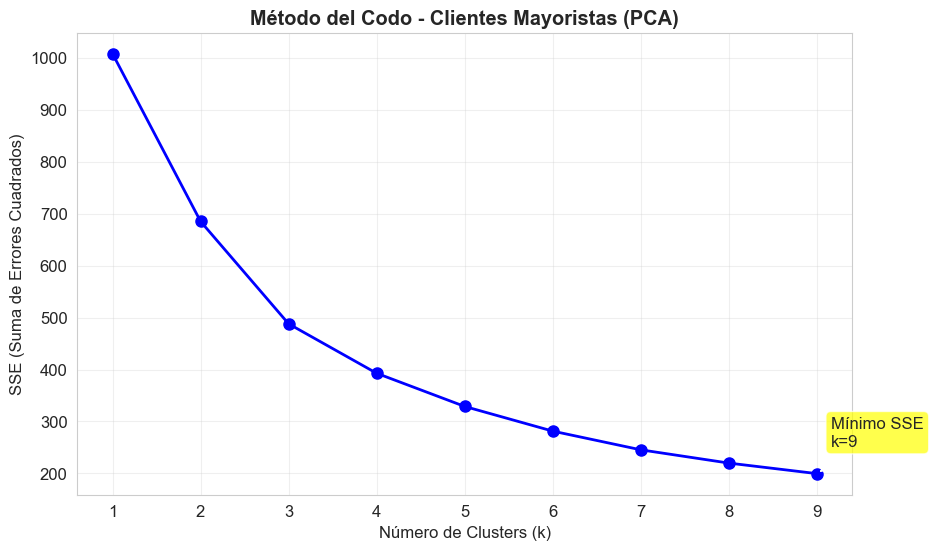


👤 ANÁLISIS DE SILUETA EN DATOS PCA:
   k=2: Silueta = 0.3860
   k=3: Silueta = 0.3450
   k=4: Silueta = 0.3211
   k=5: Silueta = 0.3375
   k=6: Silueta = 0.3376
   k=7: Silueta = 0.3407
   k=8: Silueta = 0.3199


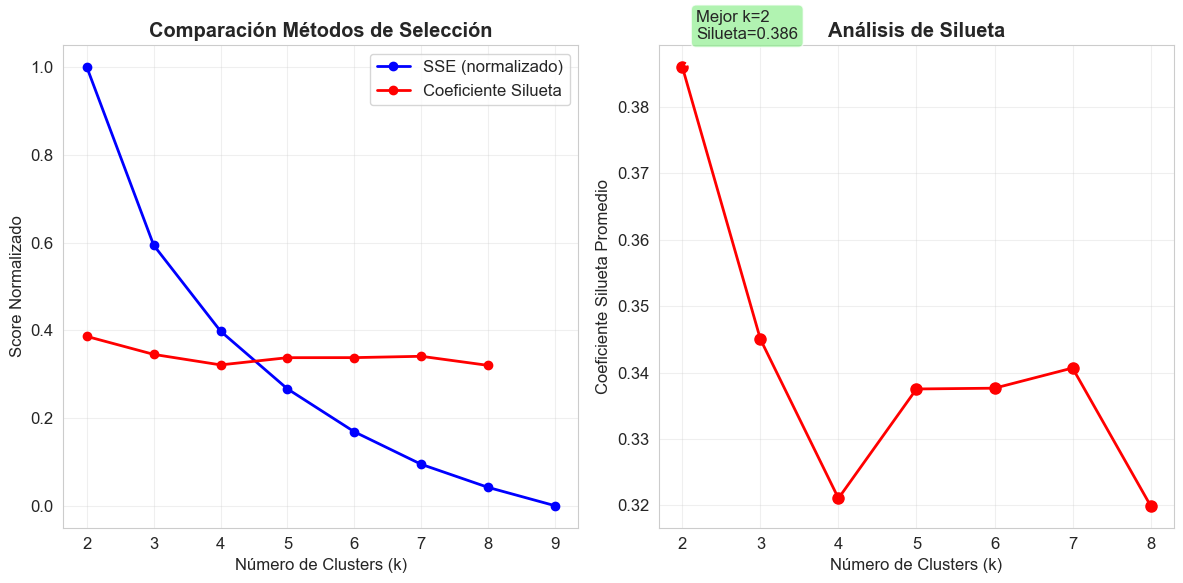


🏆 RECOMENDACIONES PARA k:
   • Método del codo sugiere: k = 2
   • Mejor silueta: k = 2 (score: 0.3860)

💼 CONSIDERACIONES DE NEGOCIO:
   • k=2: Segmentación básica (Canal: Hotel vs Retail)
   • k=3-4: Segmentación moderada (útil para estrategias diferenciadas)
   • k>5: Segmentación muy granular (útil para personalización)

🎯 DECISIÓN FINAL:
   • k recomendado: 2
   • Razón: Concordancia entre métodos
   • Interpretabilidad: Alta
✅ Selección de k óptimo completada


In [10]:
# ============================================================================
# 9. SELECCIÓN ÓPTIMA DE k PARA DATOS MAYORISTAS
# ============================================================================

print("\n🎯 9. SELECCIÓN ÓPTIMA DE k - DATOS MAYORISTAS")
print("="*50)

print("[Problema 10] Selección del número óptimo de clusters k")

# Método del codo en datos PCA
print("\n📈 MÉTODO DEL CODO EN DATOS PCA:")
k_values_wholesale, sse_values_wholesale = elbow_method(
    X_wholesale_pca, k_range=range(1, 10), n_init=10
)

plot_elbow_curve(k_values_wholesale, sse_values_wholesale, 
                "Método del Codo - Clientes Mayoristas (PCA)")

# Encontrar codo automáticamente
elbow_k_wholesale = find_elbow_point(k_values_wholesale, sse_values_wholesale)[0]

# Análisis de silueta en datos PCA
print(f"\n👤 ANÁLISIS DE SILUETA EN DATOS PCA:")
k_range_sil_wholesale = range(2, 9)
silhouette_scores_wholesale = []

for k in k_range_sil_wholesale:
    kmeans_temp = ScratchKMeans(n_clusters=k, n_init=10, verbose=False)
    labels_temp = kmeans_temp.fit_predict(X_wholesale_pca)
    
    # Usar sklearn para silueta por eficiencia en datos reales
    sil_score = silhouette_score(X_wholesale_pca, labels_temp)
    silhouette_scores_wholesale.append(sil_score)
    print(f"   k={k}: Silueta = {sil_score:.4f}")

# Gráfico de silueta vs k
plt.figure(figsize=(12, 6))

# Subplot 1: Comparación Elbow vs Silueta
plt.subplot(1, 2, 1)
# Normalizar SSE para comparación visual
sse_normalized = (np.array(sse_values_wholesale[1:]) - min(sse_values_wholesale[1:])) / \
                 (max(sse_values_wholesale[1:]) - min(sse_values_wholesale[1:]))
plt.plot(k_values_wholesale[1:], sse_normalized, 'bo-', label='SSE (normalizado)', linewidth=2)
plt.plot(list(k_range_sil_wholesale), silhouette_scores_wholesale, 'ro-', 
         label='Coeficiente Silueta', linewidth=2)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score Normalizado')
plt.title('Comparación Métodos de Selección', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Solo silueta con interpretación
plt.subplot(1, 2, 2)
plt.plot(list(k_range_sil_wholesale), silhouette_scores_wholesale, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente Silueta Promedio')
plt.title('Análisis de Silueta', fontweight='bold')
plt.grid(True, alpha=0.3)

# Resaltar mejor k según silueta
best_k_sil = list(k_range_sil_wholesale)[np.argmax(silhouette_scores_wholesale)]
best_sil_score = max(silhouette_scores_wholesale)
plt.annotate(f'Mejor k={best_k_sil}\nSilueta={best_sil_score:.3f}', 
            xy=(best_k_sil, best_sil_score),
            xytext=(10, 20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

# Decisión final
print(f"\n🏆 RECOMENDACIONES PARA k:")
print(f"   • Método del codo sugiere: k = {elbow_k_wholesale}")
print(f"   • Mejor silueta: k = {best_k_sil} (score: {best_sil_score:.4f})")

# Análisis de negocio
print(f"\n💼 CONSIDERACIONES DE NEGOCIO:")
print(f"   • k=2: Segmentación básica (Canal: Hotel vs Retail)")
print(f"   • k=3-4: Segmentación moderada (útil para estrategias diferenciadas)")
print(f"   • k>5: Segmentación muy granular (útil para personalización)")

# Decisión basada en múltiples criterios
if best_sil_score > 0.5:
    recommended_k = best_k_sil
    reason = "Silueta alta indica buena separación"
elif abs(elbow_k_wholesale - best_k_sil) <= 1:
    recommended_k = best_k_sil
    reason = "Concordancia entre métodos"
else:
    # Compromiso entre métodos
    recommended_k = min(elbow_k_wholesale, best_k_sil) + 1
    reason = "Compromiso entre eficiencia y calidad"

print(f"\n🎯 DECISIÓN FINAL:")
print(f"   • k recomendado: {recommended_k}")
print(f"   • Razón: {reason}")
print(f"   • Interpretabilidad: {'Alta' if recommended_k <= 4 else 'Moderada'}")

# Guardar k seleccionado para uso posterior
k_selected = recommended_k

print("✅ Selección de k óptimo completada")



🎯 10. CLUSTERING FINAL CON k=2
🏃‍♂️ APLICANDO K-MEANS FINAL:
🏃‍♂️ Entrenando K-means:
   • Muestras: 440
   • Características: 2
   • Clusters: 2
   • Inicializaciones: 20
   Inicialización 1/20
    Convergencia alcanzada en iteración 16
     SSE: 708.094448, Iteraciones: 16
   Inicialización 2/20
    Convergencia alcanzada en iteración 15
     SSE: 685.938755, Iteraciones: 15
   Inicialización 3/20
    Convergencia alcanzada en iteración 33
     SSE: 708.094448, Iteraciones: 33
   Inicialización 4/20
    Convergencia alcanzada en iteración 9
     SSE: 708.094448, Iteraciones: 9
   Inicialización 5/20
    Convergencia alcanzada en iteración 19
     SSE: 685.938755, Iteraciones: 19
   Inicialización 6/20
    Convergencia alcanzada en iteración 25
     SSE: 708.094448, Iteraciones: 25
   Inicialización 7/20
    Convergencia alcanzada en iteración 29
     SSE: 708.094448, Iteraciones: 29
   Inicialización 8/20
    Convergencia alcanzada en iteración 22
     SSE: 685.938755, Iteraciones: 

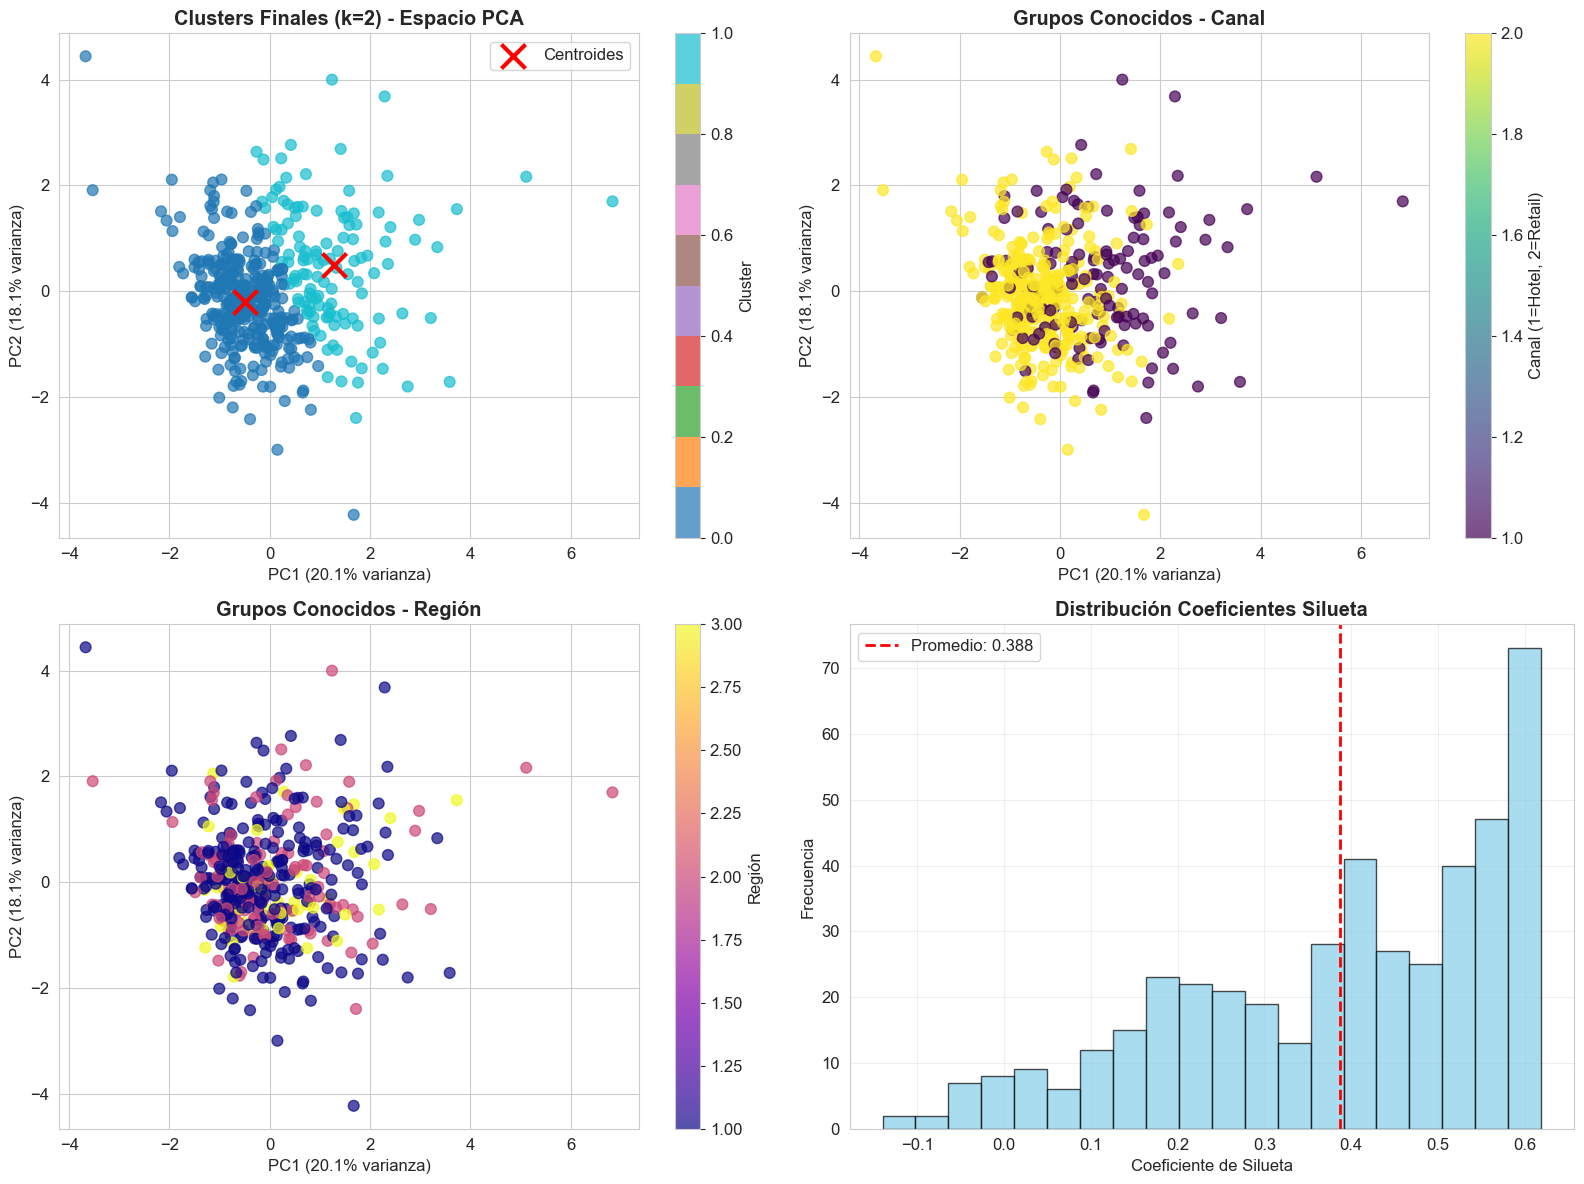

📊 CALIDAD DEL CLUSTERING:
   • Coeficiente silueta promedio: 0.3877
   • Interpretación: Excelente estructura de clusters
✅ Clustering final aplicado y visualizado


In [12]:
# ============================================================================
# 10. CLUSTERING FINAL Y ANÁLISIS DE RESULTADOS
# ============================================================================

print(f"\n🎯 10. CLUSTERING FINAL CON k={k_selected}")
print("="*40)

# Aplicar K-means con k seleccionado
print(f"🏃‍♂️ APLICANDO K-MEANS FINAL:")

# K-means en datos PCA
kmeans_final = ScratchKMeans(n_clusters=k_selected, n_init=20, 
                           max_iter=500, tol=1e-6, verbose=True)
cluster_labels_pca = kmeans_final.fit_predict(X_wholesale_pca)

# También aplicar en datos originales estandarizados para comparación
kmeans_original = ScratchKMeans(n_clusters=k_selected, n_init=20, 
                              max_iter=500, verbose=False)
cluster_labels_original = kmeans_original.fit_predict(X_wholesale_scaled)

print(f"\n📊 RESULTADOS DEL CLUSTERING:")
print(f"   • SSE en datos PCA: {kmeans_final.inertia_:.2f}")
print(f"   • SSE en datos originales: {kmeans_original.inertia_:.2f}")
print(f"   • Iteraciones PCA: {kmeans_final.n_iter_}")

# Agregar etiquetas de cluster al DataFrame
wholesale_data['Cluster_PCA'] = cluster_labels_pca
wholesale_data['Cluster_Original'] = cluster_labels_original

# Análisis de distribución de clusters
print(f"\n📈 DISTRIBUCIÓN DE CLUSTERS:")
cluster_distribution_pca = wholesale_data['Cluster_PCA'].value_counts().sort_index()
print("   Datos PCA:")
for cluster_id, count in cluster_distribution_pca.items():
    percentage = (count / len(wholesale_data)) * 100
    print(f"   • Cluster {cluster_id}: {count} clientes ({percentage:.1f}%)")

# Visualización de clusters finales
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Clusters en espacio PCA
scatter1 = axes[0,0].scatter(X_wholesale_pca[:, 0], X_wholesale_pca[:, 1], 
                           c=cluster_labels_pca, cmap='tab10', alpha=0.7, s=60)
axes[0,0].scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], 
                 marker='x', s=300, linewidths=3, color='red', label='Centroides')
axes[0,0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} varianza)')
axes[0,0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} varianza)')
axes[0,0].set_title(f'Clusters Finales (k={k_selected}) - Espacio PCA', fontweight='bold')
axes[0,0].legend()
plt.colorbar(scatter1, ax=axes[0,0], label='Cluster')

# Comparación con Channel conocido
scatter2 = axes[0,1].scatter(X_wholesale_pca[:, 0], X_wholesale_pca[:, 1], 
                           c=wholesale_data['Channel'], cmap='viridis', alpha=0.7, s=60)
axes[0,1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} varianza)')
axes[0,1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} varianza)')
axes[0,1].set_title('Grupos Conocidos - Canal', fontweight='bold')
plt.colorbar(scatter2, ax=axes[0,1], label='Canal (1=Hotel, 2=Retail)')

# Comparación con Region conocida
scatter3 = axes[1,0].scatter(X_wholesale_pca[:, 0], X_wholesale_pca[:, 1], 
                           c=wholesale_data['Region'], cmap='plasma', alpha=0.7, s=60)
axes[1,0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} varianza)')
axes[1,0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} varianza)')
axes[1,0].set_title('Grupos Conocidos - Región', fontweight='bold')
plt.colorbar(scatter3, ax=axes[1,0], label='Región')

# Análisis de silueta final
silhouette_vals_final = calculate_silhouette_scratch(X_wholesale_pca, cluster_labels_pca)
silhouette_avg_final = np.mean(silhouette_vals_final)

# Histograma de coeficientes de silueta
axes[1,1].hist(silhouette_vals_final, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].axvline(silhouette_avg_final, color='red', linestyle='--', linewidth=2,
                 label=f'Promedio: {silhouette_avg_final:.3f}')
axes[1,1].set_xlabel('Coeficiente de Silueta')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_title('Distribución Coeficientes Silueta', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 CALIDAD DEL CLUSTERING:")
print(f"   • Coeficiente silueta promedio: {silhouette_avg_final:.4f}")
print(f"   • Interpretación: {interpretation}")

print("✅ Clustering final aplicado y visualizado")
